In [327]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc

In [328]:
data = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

all_data = pd.concat([train,test],sort=False)

In [329]:
column_order = data.columns.tolist()
all_data = all_data[column_order]

# Exploring variables

### The response variable; SalePrice

The data for the Sale Prices is right skewed, which makes sense because fewer people can afford very expensive houses.

In [330]:
all_data['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

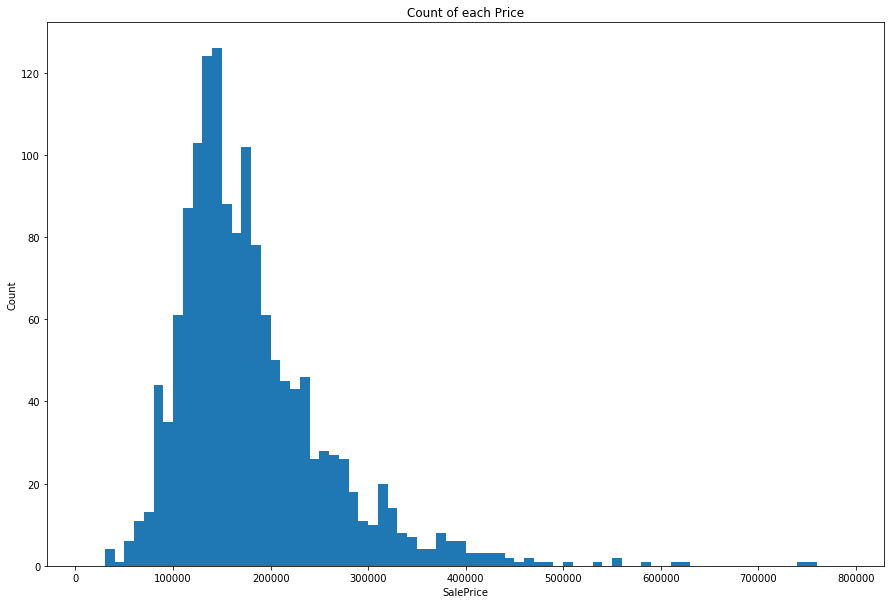

In [331]:
plt.figure(figsize=(15,10))
plt.hist(all_data['SalePrice'].dropna(), bins=np.array(range(10000,800000,10000)))
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title("Count of each Price")
plt.show()

## Important Numeric Predictors

### Correlations with SalePrice

In [332]:
# If the columns data type is int or float
numeric_columns = [col for col in all_data.columns if all_data[col].dtype in ['int64','float64']]

numeric_all_data = all_data[numeric_columns]

# Compute pairwise correlation of columns, excluding NA/null values
all_data_correlation = numeric_all_data.corr()

In [333]:
all_data_correlation

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
MSSubClass           1.00        -0.42    -0.20         0.03        -0.07       0.03          0.04        0.01       -0.06       -0.07      -0.13        -0.22     -0.25      0.31          0.03       0.07          0.01         -0.00      0.14      0.18         -0.01          0.26          0.04       -0.06         0.09       -0.05       -0.10       -0.02        -0.02          -0.02      -0.04        -0.05     -0.00    -0.03   -0.00   -0.02      -0.08
LotFrontage         -0.42         1.00     0.49         0.22        -0.08       0.12          0.09        0.22        0.22        0.05       0.11         0.35      0.46      0.03          0.00       0.38          0.11         -0.03      0.18      0.04          0.23          0.00          0.35        0.26         0.08        0.31        0.36        0.12         0.16           0.01       0.03         0.08      0.17     0.04    0.01   -0.01       0.35
LotArea             -0.20         0.49     1.00         0.10        -0.04       0.02          0.02        0.13        0.19        0.08       0.02         0.25      0.33      0.03          0.00       0.28          0.13          0.03      0.13      0.03          0.13         -0.02          0.21        0.26        -0.01        0.18        0.21        0.16         0.10           0.02       0.02         0.05      0.09     0.07    0.00   -0.02       0.26
OverallQual          0.03         0.22     0.10         1.00        -0.09       0.60          0.57        0.43        0.28       -0.04       0.28         0.55      0.48      0.25         -0.05       0.58          0.16         -0.04      0.53      0.27          0.07         -0.16          0.39        0.39         0.57        0.60        0.57        0.26         0.30          -0.14       0.02         0.04      0.03     0.01    0.03   -0.02       0.79
OverallCond         -0.07        -0.08    -0.04        -0.09         1.00      -0.37          0.05       -0.14       -0.05        0.04      -0.14        -0.17     -0.16      0.01          0.01      -0.12         -0.04          0.08     -0.22     -0.09         -0.01         -0.09         -0.09       -0.03        -0.33       -0.18       -0.15        0.02        -0.07           0.07       0.04         0.04     -0.02     0.03   -0.01    0.03      -0.08
YearBuilt            0.03         0.12     0.02         0.60        -0.37       1.00          0.61        0.31        0.28       -0.03       0.13         0.41      0.31      0.02         -0.14       0.24          0.21         -0.03      0.47      0.27         -0.05         -0.14          0.11        0.17         0.83        0.54        0.48        0.23         0.20          -0.37       0.02        -0.04      0.00    -0.01    0.01   -0.01       0.52
YearRemodAdd         0.04         0.09     0.02         0.57         0.05       0.61          1.00        0.20        0.15       -0.06       0.17         0.30      0.24      0.16         -0.06       0.32          0.13         -0.05      0.46      0.21         -0.02         -0.14          0.20        0.13         0.65        0.43        0.38        0.22         0.24          -0.22       0.04        -0.05     -0.01    -0.00    0.02    0.03       0.51
MasVnrArea           0.01         0.22     0.13         0.43        -0.14       0.31          0.20        1.00        0.30       -0.02       0.09         0.40      0.40      0.12         -0.06       0.40          0.14          0.02      0.26      0.19          0.08         -0.05          0.28        0.28         0.26        0.36        0.37        0.17         0.14          -0.11       0.

In [334]:
# Get columns with a abs(correlation) of at least .5

# Take the absolute value of the correlations in the last column (SalePrice), Sort by descending values
high_corr_columns = all_data_correlation.iloc[:,36].abs().sort_values(ascending=False)

# Take only Correlations with greater than or equal to .5
# Reset the index to get column names written in column 0 instead of as the index
# Take only column 0 (column names), and make it a list
high_corr_columns = high_corr_columns[high_corr_columns >= .5].reset_index().iloc[:,0].tolist()
high_corr_columns

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

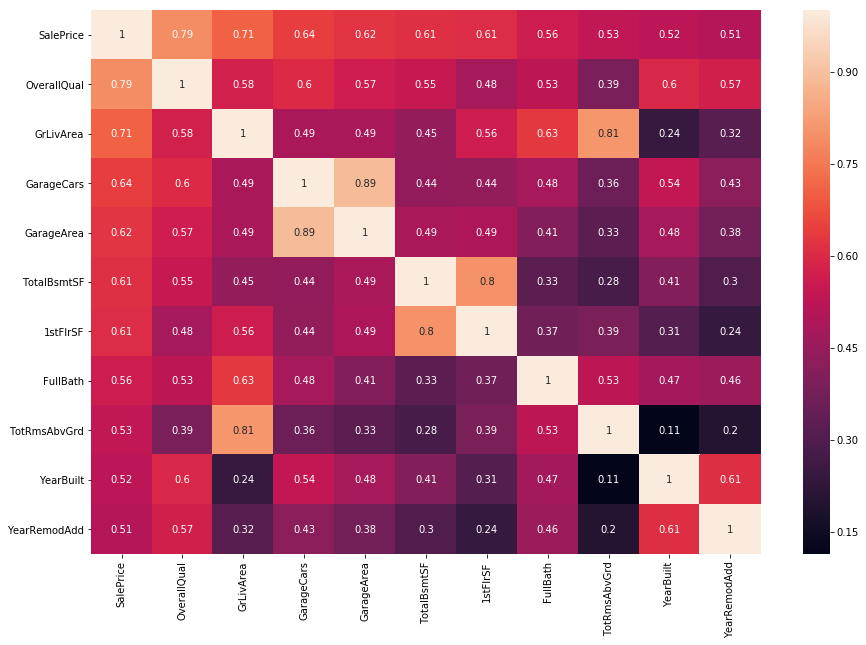

In [335]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_all_data[high_corr_columns].corr(),annot=True)
plt.show()

In [336]:
all_data_correlation = None
del all_data_correlation
numeric_all_data = None
del numeric_all_data

### Overall Quality
- Has the highest correlation with SalePrice among the numeric variables (0.79)
- OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


In [337]:
overallQual_pivot = all_data[['OverallQual','SalePrice']].pivot_table(values='SalePrice',index=all_data.index,columns='OverallQual').describe()
overallQual_pivot

OverallQual       1        2         3         4         5         6         7         8         9         10
count           2.00     3.00     20.00    116.00    397.00    374.00    319.00    168.00     43.00     18.00
mean        50150.00 51770.33  87473.75 108420.66 133523.35 161603.03 207716.42 274735.54 367513.02 438588.39
std         15344.22 14254.20  24688.57  29022.00  27107.33  36090.18  44466.26  63898.90  81278.17 159785.49
min         39300.00 35311.00  37900.00  34900.00  55993.00  76000.00  82500.00 122000.00 239000.00 160000.00
25%         44725.00 47655.50  75500.00  88000.00 118000.00 139125.00 179470.00 234557.50 318980.50 349375.00
50%         50150.00 60000.00  86250.00 108000.00 133000.00 160000.00 200141.00 269750.00 345000.00 432390.00
75%         55575.00 60000.00  97500.00 125500.00 147000.00 181000.00 230750.00 306250.00 389716.00 472875.00
max         61000.00 60000.00 139600.00 256000.00 228950.00 277000.00 383970.00 538000.00 611657.00 755000.00

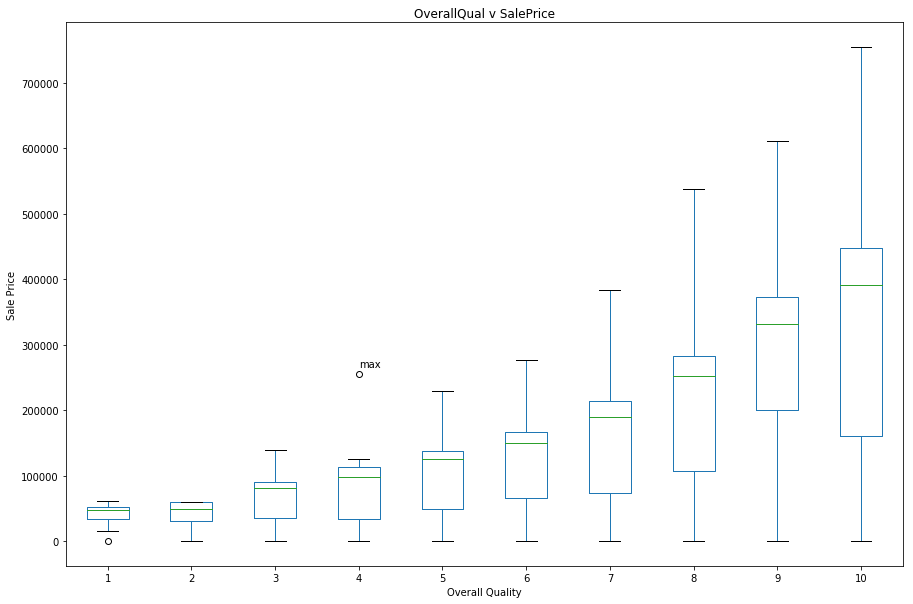

In [338]:
overallQual_pivot.plot(kind='box',figsize=(15,10))
plt.annotate(str(overallQual_pivot[overallQual_pivot[4] == overallQual_pivot[4].max()].index[0]),
             xy=(4,overallQual_pivot[4].max()),xytext=(4,overallQual_pivot[4].max()+10000))
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('OverallQual v SalePrice')
plt.show()

The positive correlation between Overall Quality and Sale Price is definitely there.  There seems to be a possible outlier at the max value of quality level 4. It looks like an overly expensive house for a quality level of 4.

In [339]:
overallQual_pivot= None
del overallQual_pivot

### Above Grade Living Area
- GrLivArea: Above grade (ground) living area in square feet
- Has the second highest correlation with SalePrice among the numeric vatiables (0.71)
    - This makes sense, Big houses generally cost more!



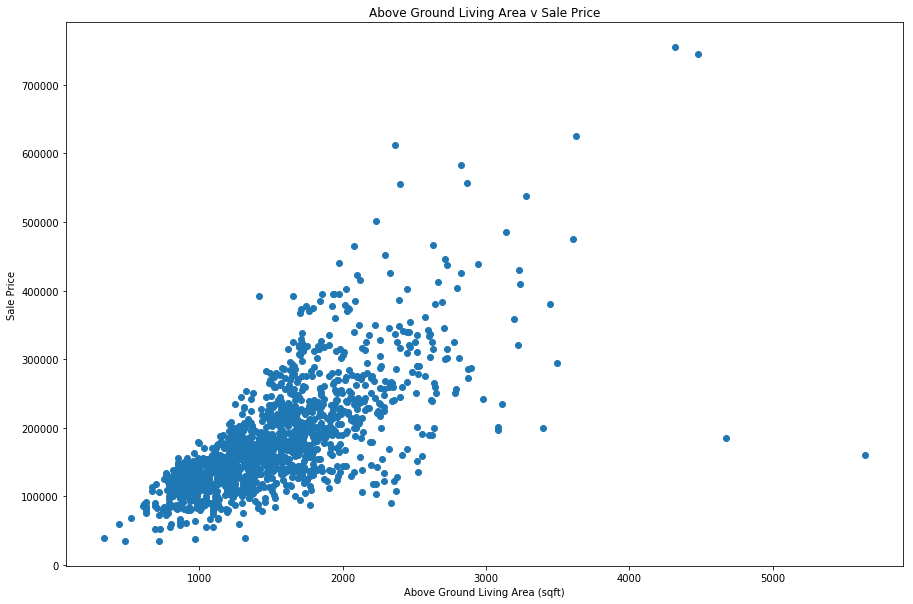

In [340]:
plt.figure(figsize=(15,10))
plt.scatter(all_data['GrLivArea'], all_data['SalePrice'])
#########
# Annotate the indexes onto the two outlier points
#########
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Above Ground Living Area v Sale Price')
plt.show()

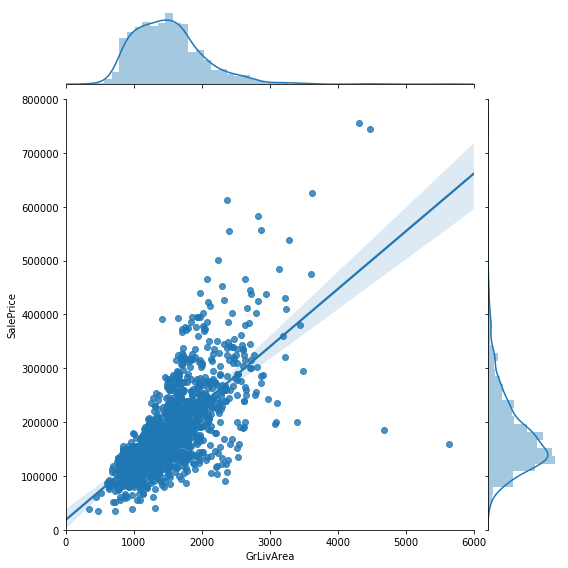

In [341]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=all_data,
              kind="reg", xlim=(0, 6000),ylim=(0,800000),height=8)

The two houses with large above ground living area for low costs (the bottom right of the image) seem like outliers as well.  Though they seem like outliers, I feel it smarter to leave them in because there could be other factors associated.  For instance, a low score on the Overall Quality could explain a low price.  However, as you can see below, these two houses actually also score a 10 on the Overall Quality.  Therefore, I will keep them in mind when looking at other variables to see if they are truly outliers, or if there is an explanation for the low Sale Price.

In [342]:
all_data.loc[all_data['GrLivArea']>4500] #2550 is a 'test' house

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
524           60       RL       130.00    40094   Pave   NaN      IR1         Bnk    AllPub    Inside       Gtl      Edwards       PosN       PosN     1Fam     2Story           10            5       2007          2008       Hip  CompShg     CemntBd     CmentBd      Stone      762.00        Ex        TA      PConc       Ex       TA           Gd          GLQ     2260.00          Unf        0.00     878.00      3138.00    GasA        Ex          Y      SBrkr      3138      1538             0       4676          1.00          0.00         3         1             3             1          Ex            11        Typ           1          Gd    BuiltIn      2007.00          Fin        3.00      884.00         TA         TA          Y         208          406              0          0            0         0    NaN   NaN         NaN        0      10    2007      New       Partial  184750.00
1299          60       RL       313.00    63887   Pave   NaN      IR3         Bnk    AllPub    Corner       Gtl      Edwards      Feedr       Norm     1Fam     2Story           10            5       2008          2008       Hip  ClyTile      Stucco      Stucco      Stone      796.00        Ex        TA      PConc       Ex       TA           Gd          GLQ     5644.00          Unf        0.00     466.00      6110.00    GasA        Ex          Y      SBrkr      4692       950             0       5642          2.00          0.00         2         1             3             1          Ex            12        Typ           3          Gd     Attchd      2008.00          Fin        2.00     1418.00         TA         TA          Y         214          292              0          0            0       480     Gd   NaN         NaN        0       1    2008      New       Partial  160000.00
2550          20       RL       128.00    39290   Pave   NaN      IR1         Bnk    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam     1Story           10            5       2008          2009       Hip  CompShg     CemntBd     CmentBd      Stone     1224.00        Ex        TA      PConc       Ex       TA           Gd          GLQ     4010.00          Unf        0.00    1085.00      5095.00    GasA   

In [343]:
all_data.loc[(524,1299),['SalePrice','GrLivArea','OverallQual']]

SalePrice  GrLivArea  OverallQual
Id                                     
524   184750.00       4676           10
1299  160000.00       5642           10

# Missing data, label encoding, and factorizing variables

### Completeness of the data

First, I'm going to check to see which variables contain missing values

In [344]:
NAcol = all_data.isnull().sum().sort_values(ascending=False)
print("There are "+str(len(NAcol[NAcol > 0]))+" columns with missing values:")
print(NAcol[NAcol > 0])

There are 35 columns with missing values:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF2         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
Exterior1st        1
KitchenQual        1
SaleType           1
Electrical         1
dtype: int64


As shown by the below 2 commands, the 1459 Na SalePrice values are the values from the test.csv dataset.

In [345]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1461          20       RH        80.00    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None        0.00        TA        TA     CBlock       TA       TA           No          Rec      468.00          LwQ      144.00     270.00       882.00    GasA        TA          Y      SBrkr       896         0             0        896          0.00          0.00         1         0             2             1          TA             5        Typ           0         NaN     Attchd      1961.00          Unf        1.00      730.00         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal
1462          20       RL        81.00    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace      108.00        TA        TA     CBlock       TA       TA           No          ALQ      923.00          Unf        0.00     406.00      1329.00    GasA        TA          Y      SBrkr      1329         0             0       1329          0.00          0.00         1         1             3             1          Gd             6        Typ           0         NaN     Attchd      1958.00          Unf        1.00      312.00         TA         TA          Y         393           36              0          0            0         0    NaN    NaN        Gar2    12500       6    2010       WD        Normal
1463          60       RL        74.00    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None        0.00        TA        TA      PConc       Gd       TA           No          GLQ      791.00          Unf        0.00     137.00       928.00    GasA        Gd          Y      SBrkr       928 

In [346]:
all_data[all_data['SalePrice'].isnull()].head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1461          20       RH        80.00    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None        0.00        TA        TA     CBlock       TA       TA           No          Rec      468.00          LwQ      144.00     270.00       882.00    GasA        TA          Y      SBrkr       896         0             0        896          0.00          0.00         1         0             2             1          TA             5        Typ           0         NaN     Attchd      1961.00          Unf        1.00      730.00         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal        nan
1462          20       RL        81.00    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace      108.00        TA        TA     CBlock       TA       TA           No          ALQ      923.00          Unf        0.00     406.00      1329.00    GasA        TA          Y      SBrkr      1329         0             0       1329          0.00          0.00         1         1             3             1          Gd             6        Typ           0         NaN     Attchd      1958.00          Unf        1.00      312.00         TA         TA          Y         393           36              0          0            0         0    NaN    NaN        Gar2    12500       6    2010       WD        Normal        nan
1463          60       RL        74.00    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None        0.00        TA        TA      PConc       Gd       TA           No          GLQ      791.00          Unf        0.00     137.00       928.00    Gas

### Imputing missing data


**######################### Pool Variables ############################**

- PoolArea: Pool area in square feet
- PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


In [347]:
# If no pool recorded, assume None
all_data['PoolQC'].fillna('None', inplace=True)

In [348]:
Qualities = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

In [349]:
all_data['PoolQC'] = all_data['PoolQC'].map(Qualities)

In [350]:
all_data['PoolQC'].value_counts()

0    2909
5       4
4       4
2       2
Name: PoolQC, dtype: int64

In [351]:
# Check for any pools assumed no pool, that have a poolArea listed.
all_data[(all_data['PoolQC']==0)&(all_data['PoolArea']>0)][['PoolArea','PoolQC']]

PoolArea  PoolQC
Id                    
2421       368       0
2504       444       0
2600       561       0

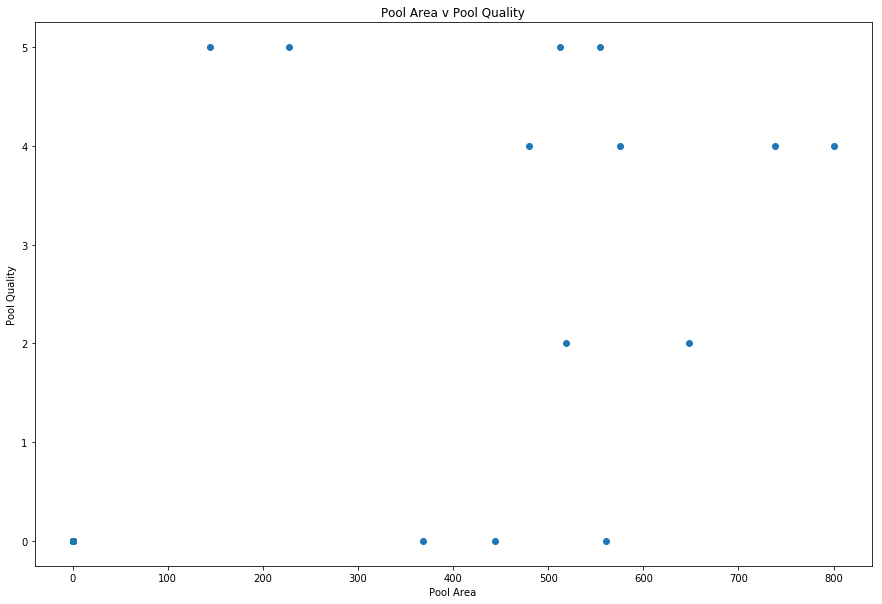

In [352]:
plt.figure(figsize=(15,10))
plt.scatter(all_data['PoolArea'],all_data['PoolQC'])
plt.xlabel('Pool Area')
plt.ylabel('Pool Quality')
plt.title('Pool Area v Pool Quality')
plt.show()

No clear correlation between pool size and pool quality.

In [353]:
# Correlation between Pool Quality that is greater than 0 and Overall Quality
all_data[(all_data['PoolQC']>0)][['PoolQC','OverallQual']].corr()

PoolQC  OverallQual
PoolQC         1.00         0.57
OverallQual    0.57         1.00

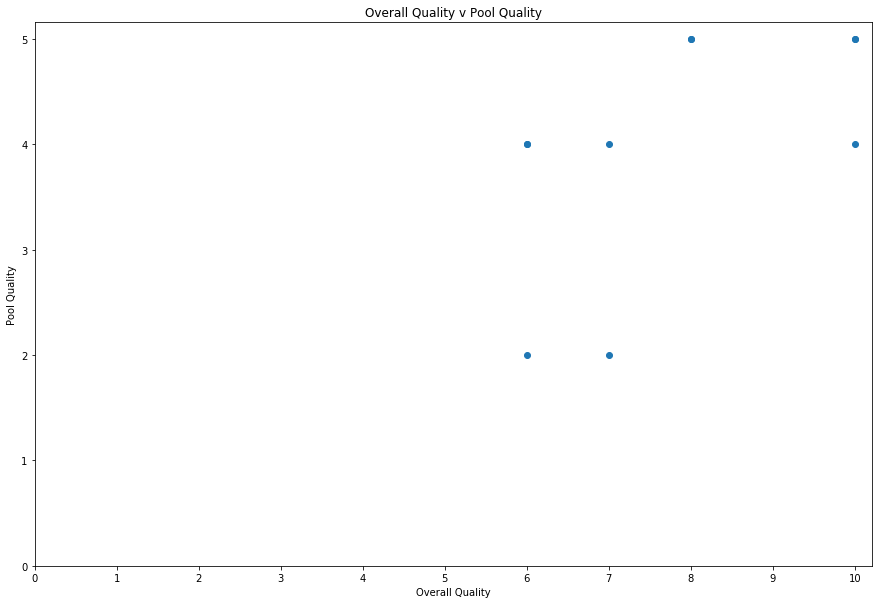

In [354]:
plt.figure(figsize=(15,10))
plt.scatter(all_data[(all_data['PoolQC']>0)]['OverallQual'],all_data[(all_data['PoolQC']>0)]['PoolQC'])
plt.xlabel('Overall Quality')
plt.ylabel('Pool Quality')
plt.title('Overall Quality v Pool Quality')
plt.yticks(np.arange(0,6,step=1))
plt.xticks(np.arange(0,11,step=1))
plt.show()

In [355]:
all_data[(all_data['PoolQC']==0)&(all_data['PoolArea']>0)][['PoolArea','PoolQC','OverallQual']]

PoolArea  PoolQC  OverallQual
Id                                 
2421       368       0            4
2504       444       0            6
2600       561       0            3

In [356]:
all_data.loc[(all_data['PoolQC']!=0)&(all_data['PoolArea']>0),['OverallQual','PoolQC']].groupby('OverallQual').describe()

PoolQC                                   
             count mean  std  min  25%  50%  75%  max
OverallQual                                          
6             3.00 3.33 1.15 2.00 3.00 4.00 4.00 4.00
7             2.00 3.00 1.41 2.00 2.50 3.00 3.50 4.00
8             2.00 5.00 0.00 5.00 5.00 5.00 5.00 5.00
10            3.00 4.67 0.58 4.00 4.50 5.00 5.00 5.00

Using the mean value for PoolQC per OverallQual

In [357]:
all_data.loc[2421,'PoolQC'] = 2
all_data.loc[2504,'PoolQC'] = 3
all_data.loc[2600,'PoolQC'] = 2

**######################### ^Pool Variables^ ############################**

**######################### Misc Features ############################**

- MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [358]:
all_data.MiscFeature.fillna('None',inplace=True)
all_data['MiscFeature'] = all_data.MiscFeature.astype('category')

In [359]:
all_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [360]:
miscFeature_pivot = all_data[['MiscFeature','SalePrice']].pivot_table(values='SalePrice',index=all_data.index , columns='MiscFeature')

Look at the median house price by feature

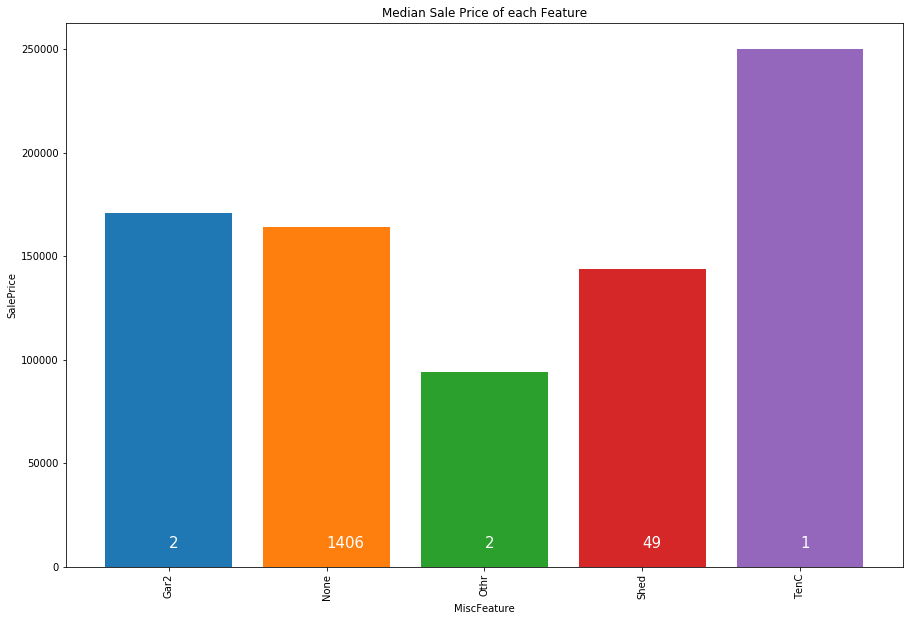

In [361]:
plt.figure(figsize=(15,10))
miscFeature_pivot.median().plot(kind='bar', width=.8)
plt.ylabel('SalePrice')
plt.xlabel('MiscFeature')
plt.title('Median Sale Price of each Feature')

# Add the counts of each feature, in white, to bottom of bar
for i in range(0,5):
    plt.text(i,9000,str(miscFeature_pivot.count()[i]), fontsize=15, color= 'white')
plt.show()

In [362]:
miscFeature_pivot = None
del miscFeature_pivot

**######################### ^Misc Features^ ############################**

**#########################     Alley     ############################**

- Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [363]:
all_data['Alley'].fillna('None',inplace=True)
all_data['Alley'] = all_data['Alley'].astype('category')

**######################### ^Alley^ ############################**

**#########################     Fence     ############################**

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [364]:
all_data.Fence.fillna("None", inplace=True)
all_data['Fence'].value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [365]:
median_fence = all_data.pivot_table(values='SalePrice',index=all_data.index,columns='Fence')

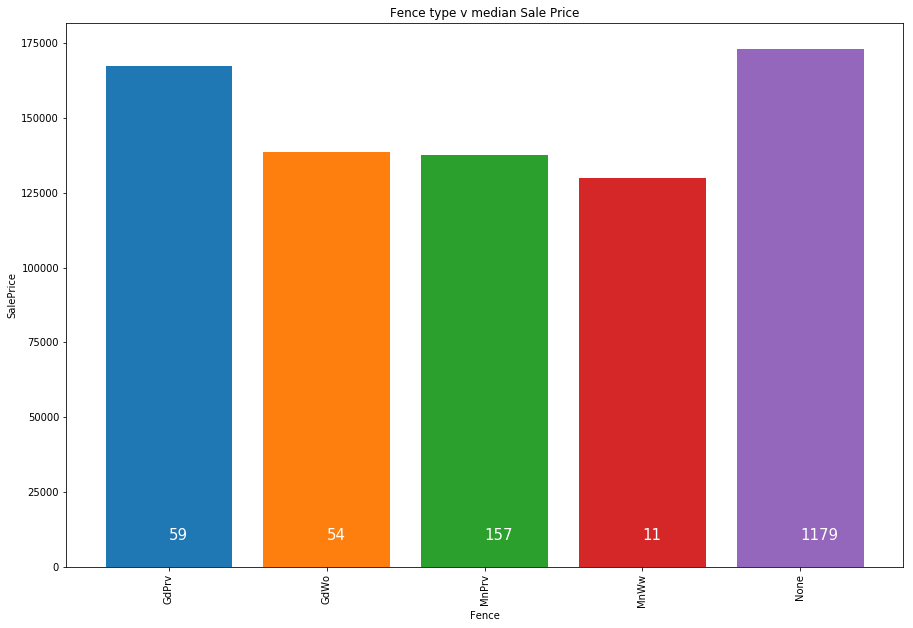

In [366]:
plt.figure(figsize=(15,10))
median_fence.median().plot(kind='bar',width=.8)
plt.xlabel('Fence')
plt.ylabel('SalePrice')
plt.title('Fence type v median Sale Price')
#plt.show()

# Add the counts of each feature, in white, to bottom of bar
for i in range(0,5):
    plt.text(i,9000,str(median_fence.count()[i]), fontsize=15, color= 'white')
plt.show()

In [367]:
median_fence = None
del median_fence

In [368]:
all_data['Fence'] = all_data['Fence'].astype('category')

**######################### ^Fence^ ############################**

**#########################     Fireplace     ############################**

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [369]:
all_data['FireplaceQu'].fillna('None',inplace=True)

print(all_data['Fireplaces'].value_counts())
print(all_data['FireplaceQu'].value_counts())

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64
None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64


The number of homes with '0' fireplaces matches the number of fireplace Qualities equaling nan

In [370]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].map(Qualities)

**Lot Variables:**
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
- LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [371]:
median_lotfrontage = all_data.pivot_table(values='LotFrontage',index=all_data.index,columns='Neighborhood')

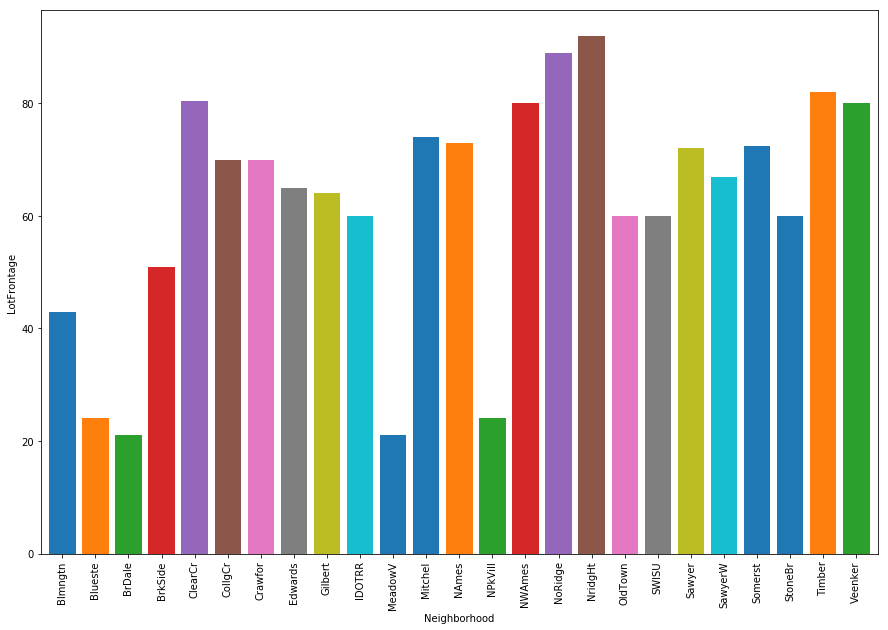

In [372]:
plt.figure(figsize=(15,10))
median_lotfrontage.median().plot(kind='bar',width=.8)
plt.ylabel("LotFrontage")
plt.xlabel("Neighborhood")
plt.show()

Going to Impute the Lot Frontage values from the Neighborhoods average value.

In [373]:
for i in range(1,len(all_data)):
    if (np.isnan(all_data.loc[i,'LotFrontage'])):
        all_data.loc[i,'LotFrontage'] = \
        int(median_lotfrontage.median()[str(all_data.loc[i,'Neighborhood'])])

In [374]:
median_lotfrontage = None
del median_lotfrontage

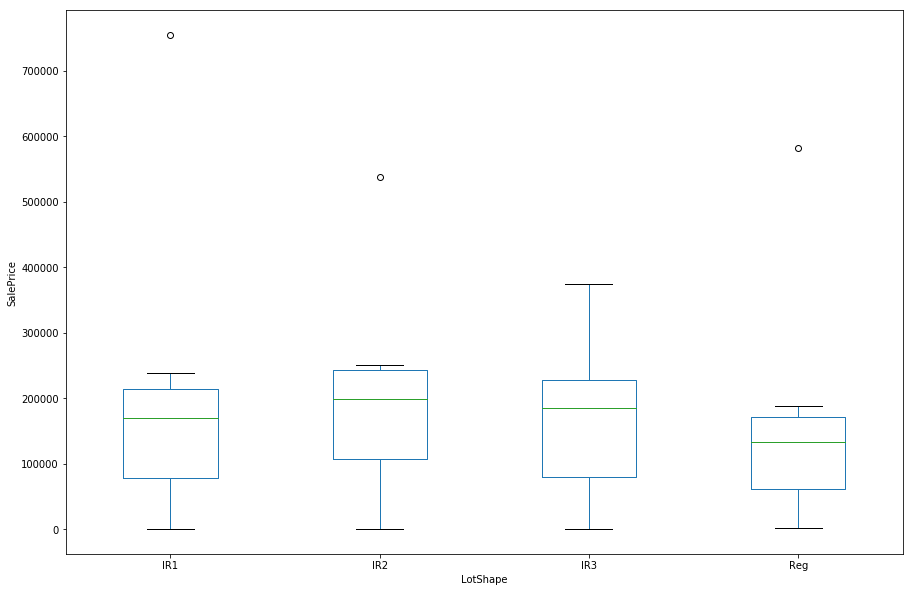

In [375]:
median_lotshape = all_data.pivot_table(values='SalePrice',index=all_data.index,columns='LotShape').describe()

median_lotshape.plot(kind='box', figsize=(15,10))
plt.ylabel("SalePrice")
plt.xlabel("LotShape")
plt.show()

In [376]:
median_lotshape = None
del median_lotshape

In [377]:
all_data['LotShape'] = all_data['LotShape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})

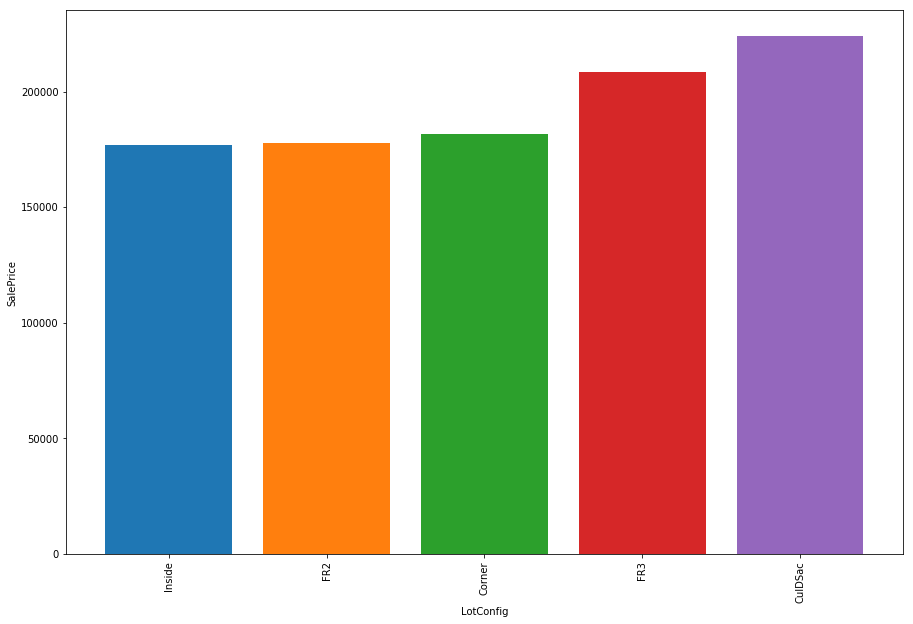

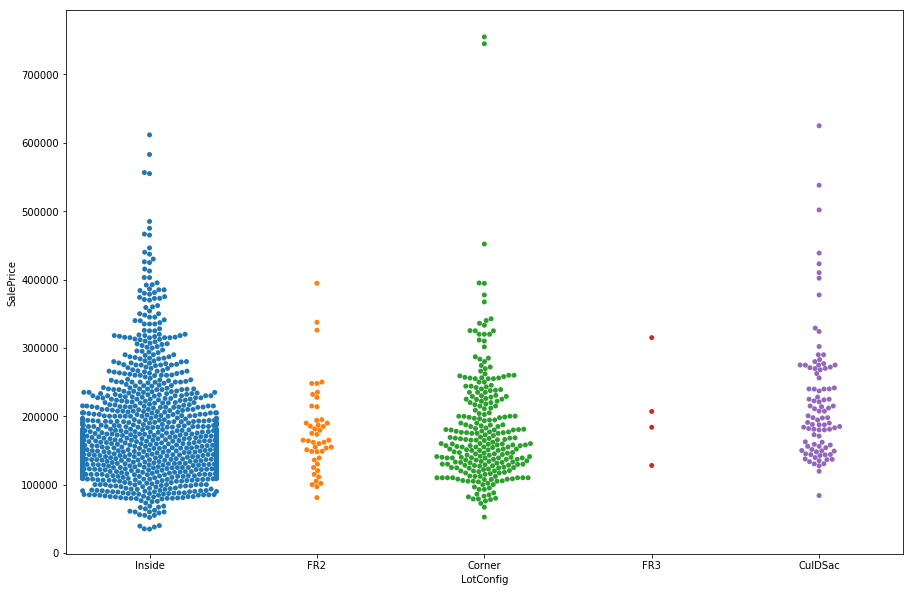

In [378]:
median_lotconfig = all_data.pivot_table(values='SalePrice',columns='LotConfig')

median_lotconfig.mean().sort_values().plot(kind='bar',figsize=(15,10), width=.8)
plt.xlabel('LotConfig')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='LotConfig',y='SalePrice',data=all_data,order=['Inside','FR2','Corner','FR3','CulDSac'])
plt.show()

There doesn't seem to be any order to the Lot Config variables, it will also be treated as type Category.

In [379]:
median_lotconfig = None
del median_lotconfig

In [380]:
all_data['LotConfig'] = all_data['LotConfig'].astype('category')

**Garage Variables:**
- GarageType: Garage location (157 NA)
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- GarageYrBlt: Year garage was built (159 NA)
		
- GarageFinish: Interior finish of the garage (159 NA)

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- GarageCars: Size of garage in car capacity (1 NA)

- GarageArea: Size of garage in square feet (1 NA)

- GarageQual: Garage quality (159 NA)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- GarageCond: Garage condition (159 NA)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Making GarageYrBlt = year the house was built

In [381]:
all_data.loc[all_data['GarageYrBlt'].isnull(),'GarageYrBlt'] = all_data.loc[all_data['GarageYrBlt'].isnull(),'YearBuilt']

In [382]:
# Checking if the 157 NA in Garage Type are the same NAs within the
#   other variables with 159 NAs

len(all_data[(all_data['GarageType'].isnull())&\
             (all_data['GarageFinish'].isnull())&\
             (all_data['GarageCond'].isnull())&\
             (all_data['GarageQual'].isnull())])

157

In [383]:
# The other 2 rows with NAs in a Garage variable
all_data[(~all_data['GarageType'].isnull())&\
         (all_data['GarageFinish'].isnull())&\
         (all_data['GarageCond'].isnull())&\
         (all_data['GarageQual'].isnull())]\
[['GarageCars', 'GarageArea', 'GarageType',
  'GarageCond', 'GarageQual', 'GarageFinish']]

GarageCars  GarageArea GarageType GarageCond GarageQual GarageFinish
Id                                                                        
2127        1.00      360.00     Detchd        NaN        NaN          NaN
2577         nan         nan     Detchd        NaN        NaN          NaN

In [384]:
all_data.loc[2127,'GarageFinish'] = all_data['GarageFinish'].mode()[0]
all_data.loc[2127,'GarageCond'] = all_data['GarageCond'].mode()[0]
all_data.loc[2127,'GarageQual'] = all_data['GarageQual'].mode()[0]

In [385]:
all_data.loc[2577,'GarageCars'] = 0
all_data.loc[2577,'GarageArea'] = 0
all_data.loc[2577,'GarageType'] = np.nan

In [386]:
len(all_data[(all_data['GarageType'].isnull())&\
             (all_data['GarageFinish'].isnull())&\
             (all_data['GarageCond'].isnull())&\
             (all_data['GarageQual'].isnull())])

158

Now the 4 chatacter variables related to garage all have the same set of 158 NAs.  Which correspond to: "No Garage".

GarageType does not seem to be Ordinal, so we will use it as a categorical variable.

In [387]:
all_data['GarageType'].fillna('No Garage', inplace = True)

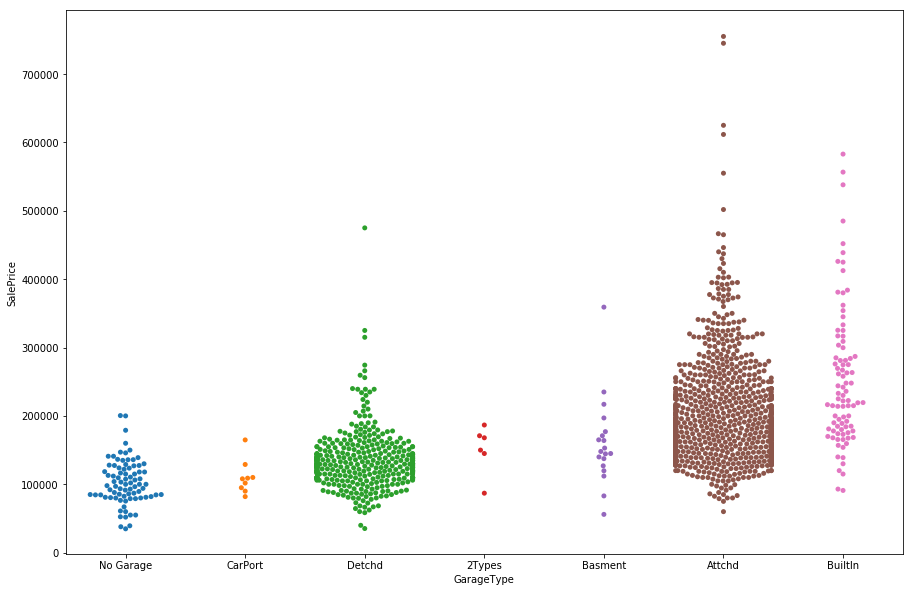

In [388]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='GarageType',y='SalePrice',
              data=all_data, 
              order=['No Garage','CarPort','Detchd',
                     '2Types','Basment','Attchd','BuiltIn'
                    ]
             )
plt.show()

In [389]:
all_data['GarageType'] = all_data['GarageType'].astype('category')

The values of GarageFinish seem to be ordinal

In [390]:
all_data['GarageFinish'].fillna('None', inplace=True)
FinishQual = {'None':0, 'Unf':1, 'RFn':2, 'Fin':3}

all_data['GarageFinish'] = all_data['GarageFinish'].map(FinishQual)

FinishQual = None
del FinishQual

GarageQual is another variable that is ordinal

In [391]:
all_data['GarageQual'].fillna('None',inplace=True)
all_data['GarageQual'] = all_data['GarageQual'].map(Qualities)

In [392]:
all_data['GarageCond'].fillna('None',inplace=True)
all_data['GarageCond'] = all_data['GarageCond'].map(Qualities)

**Basement Variables:**
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
- BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
- BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
- BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
- BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement



In [393]:
# Check if all 79 NAs are the same observations among the variables
# with 80+ NAs

len(all_data[(all_data['BsmtQual'].isnull())&\
   (all_data['BsmtCond'].isnull())&\
   (all_data['BsmtExposure'].isnull())&\
   (all_data['BsmtFinType1'].isnull())&\
   (all_data['BsmtFinType2'].isnull())]
   )

79

In [394]:
# The additional NAs
all_data.loc[(~all_data['BsmtFinType1'].isnull()) &\
             (all_data['BsmtCond'].isnull() |\
             all_data['BsmtQual'].isnull() |\
             all_data['BsmtExposure'].isnull() |\
             all_data['BsmtFinType2'].isnull()),
             ['BsmtQual', 'BsmtCond', 'BsmtExposure',
              'BsmtFinType1', 'BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
Id                                                           
333        Gd       TA           No          GLQ          NaN
949        Gd       TA          NaN          Unf          Unf
1488       Gd       TA          NaN          Unf          Unf
2041       Gd      NaN           Mn          GLQ          Rec
2186       TA      NaN           No          BLQ          Unf
2218      NaN       Fa           No          Unf          Unf
2219      NaN       TA           No          Unf          Unf
2349       Gd       TA          NaN          Unf          Unf
2525       TA      NaN           Av          ALQ          Unf

In [395]:
all_data.loc[333,'BsmtFinType2'] = all_data['BsmtFinType2'].mode()[0]
all_data.loc[( 949,1488,2349),'BsmtExposure'] = all_data['BsmtExposure'].mode()[0]
all_data.loc[(2041,2186,2525),'BsmtCond'] = all_data['BsmtCond'].mode()[0]
all_data.loc[(2218, 2219),'BsmtQual'] = all_data['BsmtQual'].mode()[0]

In [396]:
# Acknowledging there is redundant code below
# I wanted extra practice typing it out for muscle memory

all_data['BsmtQual'].fillna('None', inplace=True)
all_data['BsmtQual'] = all_data['BsmtQual'].map(Qualities)

all_data['BsmtCond'].fillna('None', inplace=True)
all_data['BsmtCond'] = all_data['BsmtCond'].map(Qualities)

all_data['BsmtExposure'].fillna('None', inplace=True)
exposureQual = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
all_data['BsmtExposure'] = all_data['BsmtExposure'].map(exposureQual)

all_data['BsmtFinType1'].fillna('None',inplace=True)
fintypeQual = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].map(fintypeQual)

all_data['BsmtFinType2'].fillna('None',inplace=True)
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].map(fintypeQual)

In [397]:
exposureQual = None
fintypeQual = None
del (exposureQual,fintypeQual)

In [398]:
# Remaining Basement variable NAs

all_data.loc[(all_data['BsmtFullBath'].isnull()|\
        all_data['BsmtHalfBath'].isnull()|\
        all_data['BsmtFinSF1'].isnull()|\
        all_data['BsmtFinSF2'].isnull()|\
        all_data['BsmtUnfSF'].isnull()|\
        all_data['TotalBsmtSF'].isnull()),
             ['BsmtQual', 'BsmtFullBath', 'BsmtHalfBath',
              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

BsmtQual  BsmtFullBath  BsmtHalfBath  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
Id                                                                                        
2121         0           nan           nan         nan         nan        nan          nan
2189         0           nan           nan        0.00        0.00       0.00         0.00

From the look of it, those houses do not have Basments

In [399]:
all_data.loc[(2121,2189),['BsmtQual', 'BsmtFullBath', 'BsmtHalfBath',
              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0

**Masonry Variables:**
- MasVnrArea: Masonry veneer area in square feet (23 NAs)
- MasVnrType: Masonry veneer type (24 NAs)

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [400]:
len(all_data[all_data['MasVnrType'].isnull() &\
             all_data['MasVnrArea'].isnull()])

23

In [401]:
all_data.loc[(all_data['MasVnrType'].isnull() &\
              ~all_data['MasVnrArea'].isnull()),
            ['MasVnrType','MasVnrArea']]

MasVnrType  MasVnrArea
Id                         
2611        NaN      198.00

In [402]:
all_data.loc[2611,'MasVnrType'] = all_data['MasVnrType'].mode()[0]

In [403]:
all_data['MasVnrType'].fillna('None',inplace=True)

In [404]:
all_data.pivot_table(values='SalePrice',columns='MasVnrType').median().sort_values()

MasVnrType
BrkCmn    146318.07
None      156958.24
BrkFace   204691.87
Stone     265583.62
dtype: float64

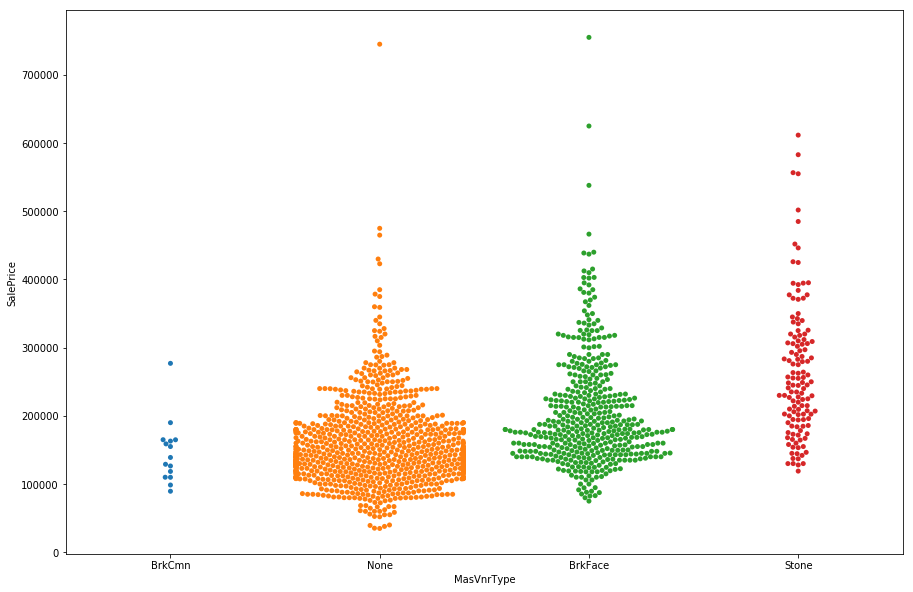

In [405]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='MasVnrType',y='SalePrice',data=all_data,order=['BrkCmn','None','BrkFace','Stone'])
plt.show()

In [406]:
masonryQual = {'None':0, 'BrkCmn':0, 'BrkFace':1, 'Stone':2}
all_data['MasVnrType'] = all_data['MasVnrType'].map(masonryQual)

In [407]:
masonryQual = None
del masonryQual

In [408]:
all_data['MasVnrArea'].fillna(0,inplace=True)

**MSZoning:**
- MSZoning: Identifies the general zoning classification of the sale. (4 NAs)
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [409]:
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
all_data['MSZoning'] = all_data['MSZoning'].astype('category')

In [410]:
all_data.pivot_table(values='SalePrice',columns='MSZoning').median().sort_values()

MSZoning
C (all)    74528.00
RM        126316.83
RH        131558.38
RL        191004.99
FV        214014.06
dtype: float64

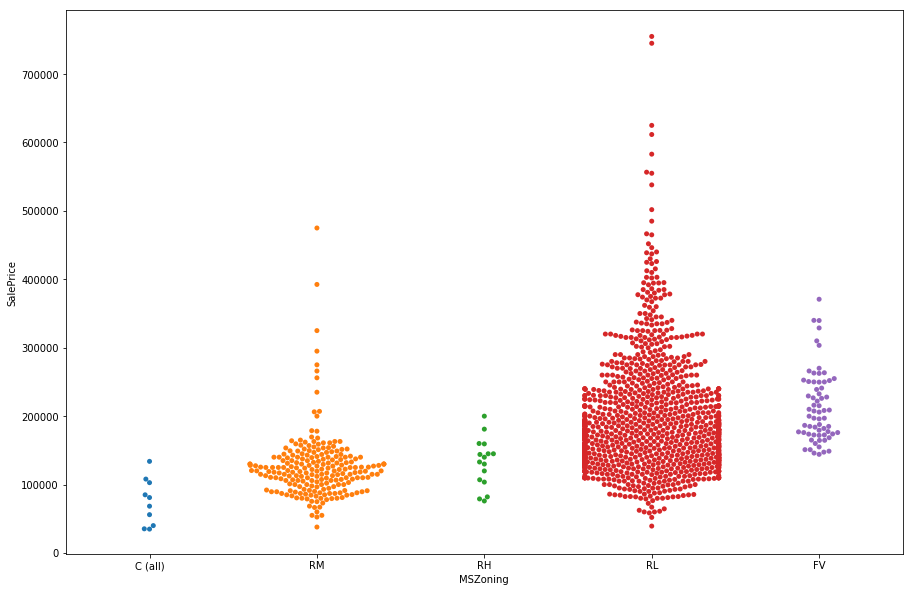

In [411]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='MSZoning',y='SalePrice',data=all_data,
              order=["C (all)","RM",'RH','RL','FV'])
plt.show()

**Kitchen Variables:**
- Kitchen: Kitchens above grade (0 NA)
- KitchenQual: Kitchen quality  (1 NA)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [412]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0], inplace=True)
all_data['KitchenQual'] = all_data['KitchenQual'].map(Qualities)

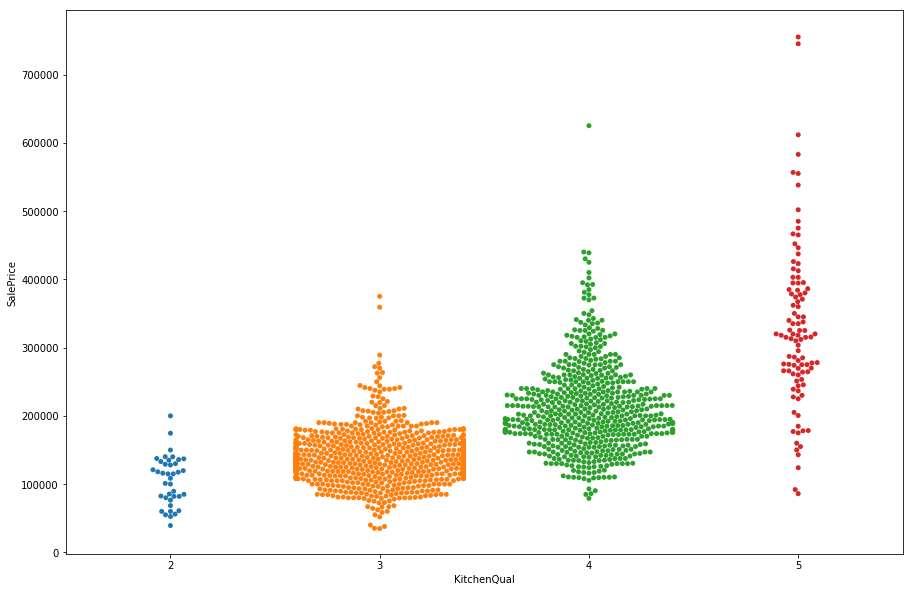

In [413]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='KitchenQual',y='SalePrice',data=all_data)
plt.show()

**Utilities:**
- Utilities: Type of utilities available (2 NAs)
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [414]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Since all houses except for 1 have AllPub as the Utilities variable, this is not a helpful predictor.  I'm going to remove it.

In [415]:
all_data.drop(['Utilities'], inplace=True, axis=1)

**Functional:**
- Functional: Home functionality (Assume typical unless deductions are warranted) (2 NAs)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [416]:
all_data['Functional'].fillna(all_data['Functional'].mode()[0], inplace=True)

all_data['Functional'] = \
all_data['Functional'].map({'Sal':0,'Sev':1, 'Maj2':2, 'Maj1':3,
                            'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

all_data['Functional'].value_counts()

7    2719
5      70
6      65
4      35
3      19
2       9
1       2
Name: Functional, dtype: int64

**Exterior Variables:**
- Exterior1st: Exterior covering on house (1 NAs)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- Exterior2nd: Exterior covering on house (if more than one material) (1 NAs)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
- ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [417]:
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace=True)
all_data['Exterior1st'] = all_data['Exterior1st'].astype('category')

all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0],inplace=True)
all_data['Exterior2nd'] = all_data['Exterior2nd'].astype('category')

all_data['ExterQual'] = all_data['ExterQual'].map(Qualities)

all_data['ExterCond'] = all_data['ExterCond'].map(Qualities)

**Electrical Variable:**
- Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [418]:
all_data.Electrical.fillna(all_data['Electrical'].mode()[0],inplace=True)
all_data['Electrical'] = all_data.Electrical.astype('category')

**Sale Type Vaeiable:**
- SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [419]:
all_data.SaleType.fillna(all_data['SaleType'].mode()[0],inplace=True)
all_data['SaleType'] = all_data.SaleType.astype('category')

all_data['SaleCondition'] = all_data.SaleType.astype('category')

Double check for NA values

In [420]:
NAcol = all_data.isnull().sum().sort_values(ascending=False)
print("There are "+str(len(NAcol[NAcol > 0]))+" columns with missing values:")
print(NAcol[NAcol > 0])

There are 1 columns with missing values:
SalePrice    1459
dtype: int64


## Label encoding/factorizing the remaining character variables

In [421]:
for count, i in enumerate(list(all_data.select_dtypes(include=['object']).columns)):
    print(str(count+1) +": "+ str(i))

1: Street
2: LandContour
3: LandSlope
4: Neighborhood
5: Condition1
6: Condition2
7: BldgType
8: HouseStyle
9: RoofStyle
10: RoofMatl
11: Foundation
12: Heating
13: HeatingQC
14: CentralAir
15: PavedDrive


In [422]:
# 1
all_data['Street'] = all_data['Street'].map({'Grvl':0,'Pave':1})
# 2
all_data['LandContour'] = all_data['LandContour'].astype('category')
# 3
all_data['LandSlope'] = all_data['LandSlope'].map({'Sev':0,'Mod':1,'Gtl':2})
# 4
all_data['Neighborhood'] = all_data['Neighborhood'].astype('category')
# 5
all_data['Condition1'] = all_data['Condition1'].astype('category')
# 6
all_data['Condition2'] = all_data['Condition2'].astype('category')
# 7
all_data['BldgType'] = all_data['BldgType'].astype('category')
# 8
all_data['HouseStyle'] = all_data['HouseStyle'].astype('category')
# 9
all_data['RoofStyle'] = all_data['RoofStyle'].astype('category')
# 10
all_data['RoofMatl'] = all_data['RoofMatl'].astype('category')
# 11
all_data['Foundation'] = all_data['Foundation'].astype('category')
# 12
all_data['Heating'] = all_data['Heating'].astype('category')
# 13
all_data['HeatingQC'] = all_data['HeatingQC'].map(Qualities)
# 14
all_data['CentralAir'] = all_data['CentralAir'].map({'N':0, 'Y':1})
# 15
all_data['PavedDrive'] = all_data['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

In [423]:
print("NA values left: "+str(all_data.isnull().sum().sum()))
print("NA values in SalePrice: "+str(all_data.SalePrice.isnull().sum()))
print("Length of test set: "+str(len(test)))

NA values left: 1459
NA values in SalePrice: 1459
Length of test set: 1459


## Changing some numeric variables into factors

**Year and Month Sold:**

In [424]:
all_data['MoSold'] = all_data['MoSold'].astype('category')

In [425]:
median_yrSold = all_data.pivot_table(values='SalePrice',columns='YrSold')
median_moSold = all_data.pivot_table(values='SalePrice',columns='MoSold')

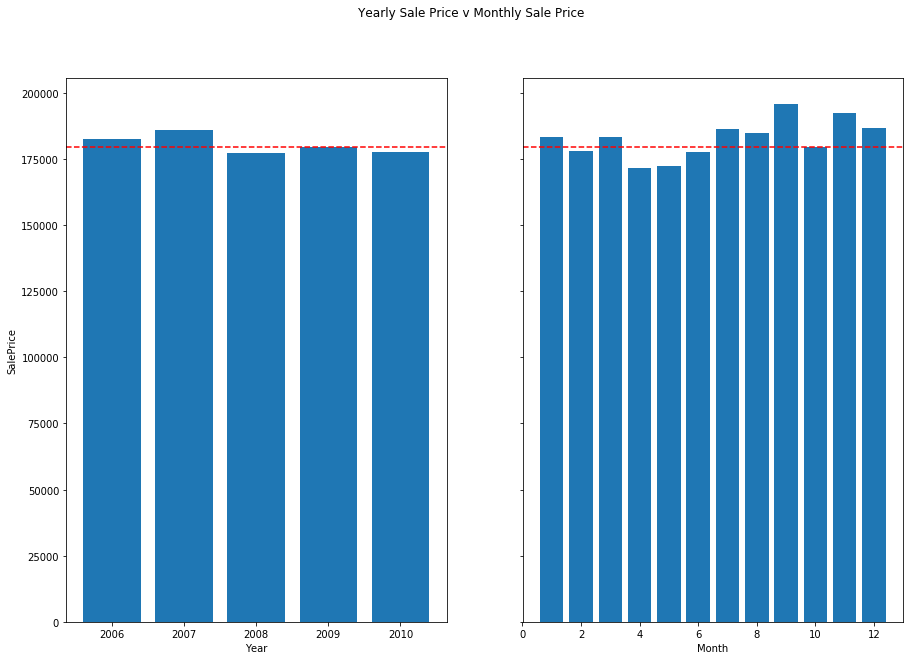

In [426]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))
ax1.bar(median_yrSold.median().index,median_yrSold.median().values)
ax1.axhline(median_yrSold.median().median(),color='red',linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('SalePrice')

f.suptitle("Yearly Sale Price v Monthly Sale Price")

ax2.bar(median_moSold.median().index,median_moSold.median().values)
ax2.axhline(median_yrSold.median().median(),color='red',linestyle='dashed')
ax2.set_xlabel('Month')

plt.show()

In [427]:
median_yrSold = None
median_moSold = None
ax1 = None
ax2 = None
f = None
del (median_yrSold,median_moSold,ax1,ax2,f)

**MSSubClass:**

In [428]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('object')

all_data['MSSubClass'] = \
all_data['MSSubClass'].map({20:'1 story 1946+',
                            30:'1 story 1945-',
                            40:'1 story unf attic',
                            45:'1,5 story unf',
                            50:'1,5 story fin',
                            60:'2 story 1946+',
                            70:'2 story 1945-',
                            75:'2,5 story all ages',
                            80:'split/multi level',
                            85:'split foyer',
                            90:'duplex all style/age',
                            120:'1 story PUD 1946+',
                            150:'1,5 story PUD all',
                            160:'2 story PUD 1946+',
                            180:'PUD multilevel',
                            190:'2 family conversion'})

all_data['MSSubClass'] = all_data['MSSubClass'].astype('category')

In [429]:
column_order, NAcol, Qualities, i, count = None,None,None,None,None
del(column_order, NAcol, Qualities, i, count)
gc.collect()

41993

# Visualization of important variables

In [430]:
numeric_columns = [c for c in all_data.columns if all_data[c].dtype in ['int64','float64']]
category_columns = [c for c in all_data.columns if all_data[c].dtype not in ['int64','float64']]
len(category_columns)

23

In [431]:
high_corr_columns = all_data[numeric_columns].corr().iloc[:,55].abs().sort_values(ascending=False)

# Take only Correlations with greater than or equal to .5
# Reset the index to get column names written in column 0 instead of as the index
# Take only column 0 (column names), and make it a list
high_corr_columns = high_corr_columns[high_corr_columns >= .5].reset_index().iloc[:,0].tolist()
high_corr_columns

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'FireplaceQu',
 'GarageYrBlt',
 'YearRemodAdd']

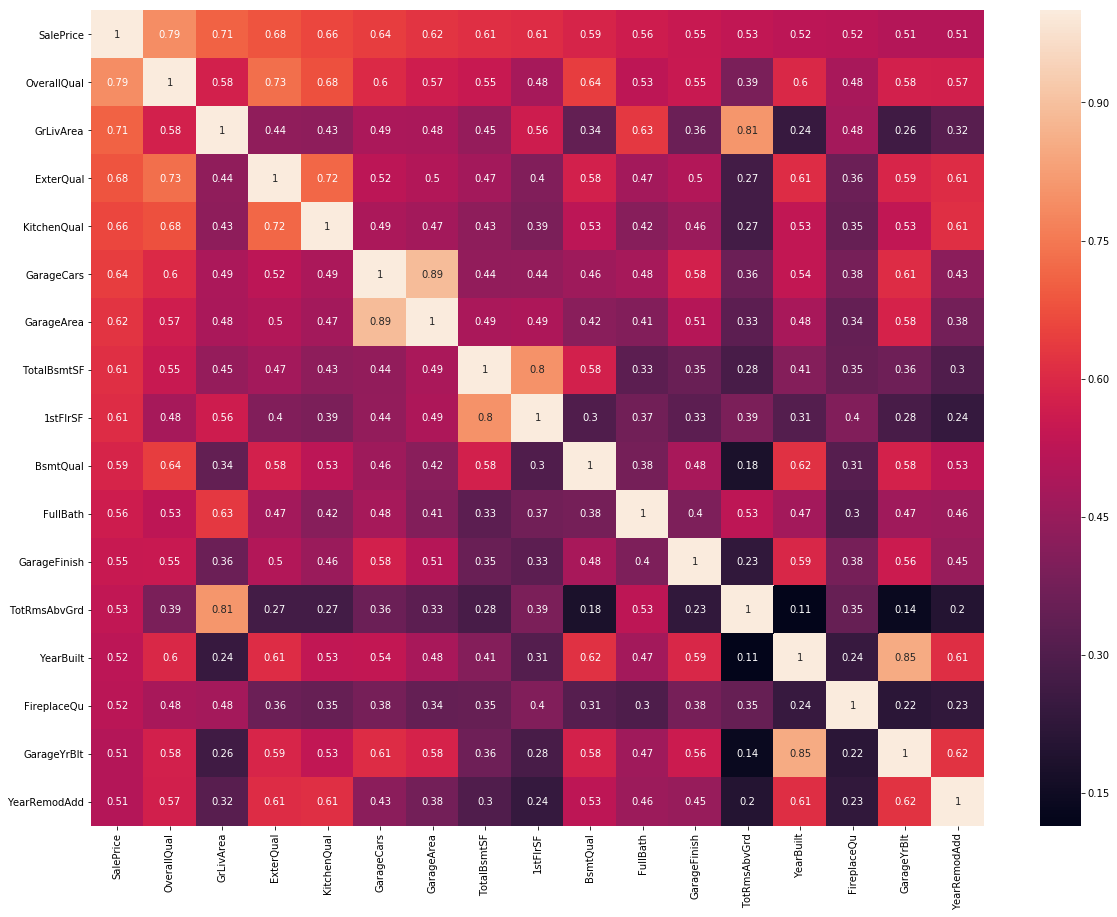

In [432]:
plt.figure(figsize=(20,15))
sns.heatmap(all_data[high_corr_columns].corr(), annot=True)
plt.show()

## Feature Engineering

### Total Number of Bathrooms

In [433]:
all_data['TotBathrooms'] = all_data['FullBath'] + (all_data['HalfBath']*.5)+ all_data['BsmtFullBath'] + (all_data['BsmtHalfBath']*.5)

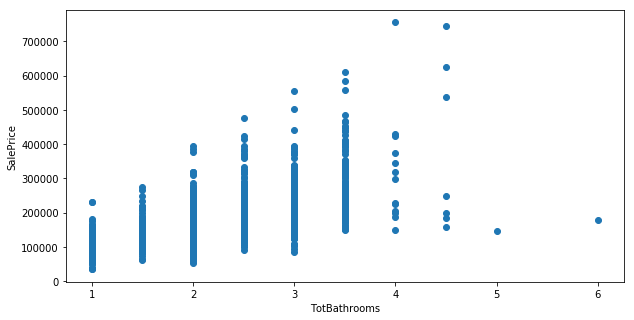

In [434]:
plt.figure(figsize=(10,5))
plt.scatter(all_data['TotBathrooms'],all_data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotBathrooms')
plt.show()

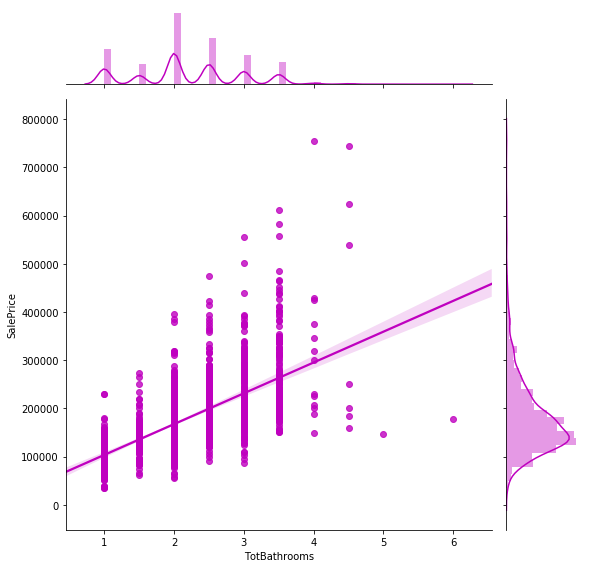

In [435]:
sns.jointplot(data=all_data, x='TotBathrooms',y='SalePrice', 
              kind='reg', height =8,ratio=5, color='m')

In [436]:
all_data[['TotBathrooms','SalePrice']].corr()

TotBathrooms  SalePrice
TotBathrooms          1.00       0.63
SalePrice             0.63       1.00

### Adding 'House age', 'Remodeled (Yes/No), and IsNew variables

In [437]:
all_data.loc[(all_data['YearBuilt']==all_data['YearRemodAdd']),'Remod'] = 0
all_data['Remod'].fillna(1, inplace=True)

In [438]:
all_data['Age'] = all_data['YrSold']-all_data['YearRemodAdd']

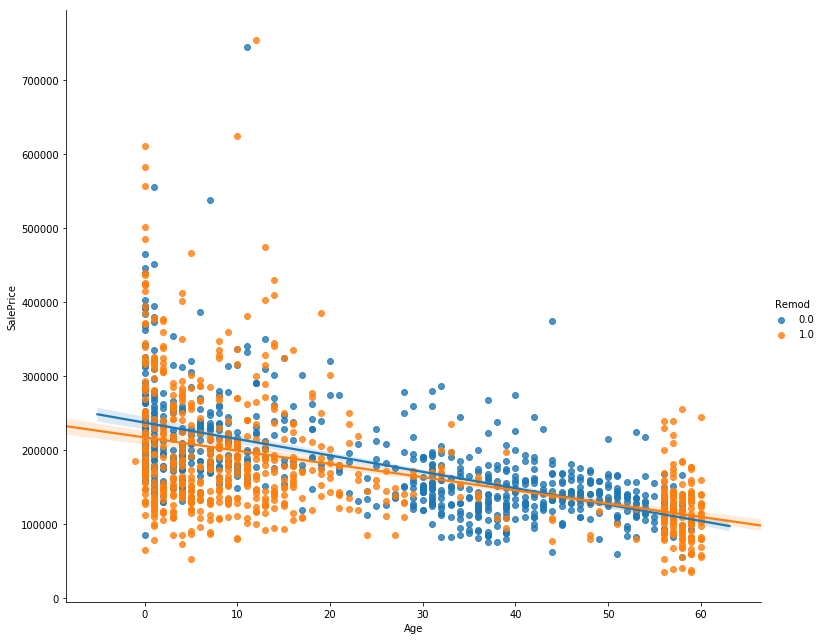

In [439]:
sns.lmplot(x='Age',y='SalePrice',hue='Remod',data=all_data, height=9, aspect=1.2)
plt.show()

As shown above in the figure as well as below by the correlation, there is a negative correlation between age and sale price.

In [440]:
all_data[['Age','SalePrice']].corr()

Age  SalePrice
Age        1.00      -0.51
SalePrice -0.51       1.00

In [441]:
all_data.loc[(all_data['YrSold']==all_data['YearBuilt']),'IsNew'] = 1
all_data['IsNew'].fillna(0,inplace=True)

In [442]:
del all_data['YrSold']

### Binning Neighborhood

In [443]:
_ = all_data.pivot_table(values='SalePrice',columns='Neighborhood')

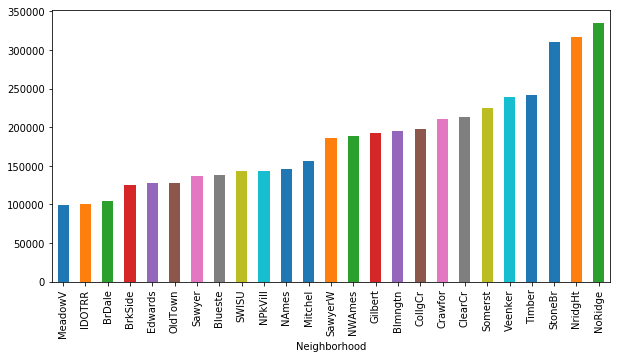

In [444]:
plt.figure(figsize=(10,5))
_.median().sort_values().plot(kind='bar')
plt.show()

In [445]:
all_data.loc[(all_data['Neighborhood'].isin(['StoneBr', 'NridgHt', 'NoRidge'])),'NeighWealth'] = 2
all_data.loc[(all_data['Neighborhood'].isin(['MeadowV', 'IDOTRR', 'BrDale'])),'NeighWealth'] = 0
all_data['NeighWealth'].fillna(1,inplace=True)

In [446]:
all_data.NeighWealth.value_counts()

1.00    2471
2.00     288
0.00     160
Name: NeighWealth, dtype: int64

### Total Square Feet

In [447]:
all_data['TotalSqFeet'] = all_data['GrLivArea'] + all_data['TotalBsmtSF']

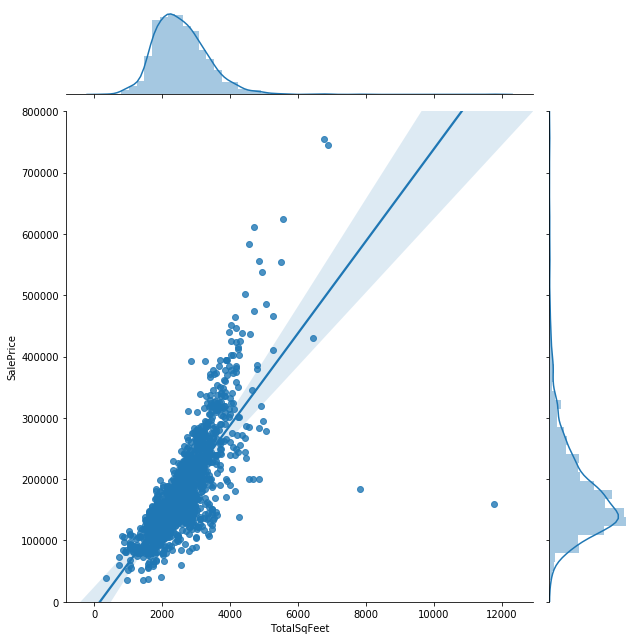

In [448]:
sns.jointplot(x='TotalSqFeet',y='SalePrice',data=all_data,
           kind='reg',height=9,ylim=(0,800000))
plt.show()

In [449]:
all_data[['SalePrice','TotalSqFeet','GrLivArea', 'TotalBsmtSF']].corr()

SalePrice  TotalSqFeet  GrLivArea  TotalBsmtSF
SalePrice         1.00         0.78       0.71         0.61
TotalSqFeet       0.78         1.00       0.87         0.83
GrLivArea         0.71         0.87       1.00         0.45
TotalBsmtSF       0.61         0.83       0.45         1.00

### Consolidating Porch variables

- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet

In [450]:
all_data['TotalPorchSF']=all_data['OpenPorchSF']+all_data['EnclosedPorch']+all_data['3SsnPorch']+all_data['ScreenPorch']

In [451]:
all_data[['TotalPorchSF','SalePrice']].corr()

TotalPorchSF  SalePrice
TotalPorchSF          1.00       0.20
SalePrice             0.20       1.00

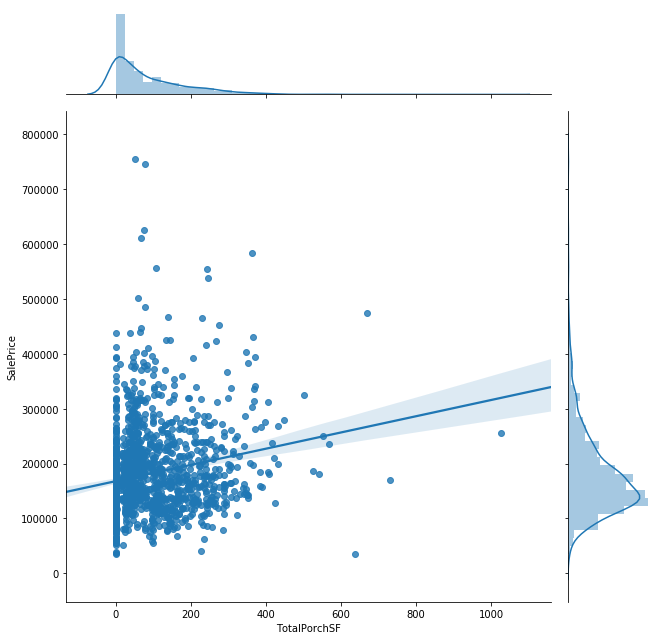

In [452]:
sns.jointplot(x='TotalPorchSF',y='SalePrice',data=all_data,
              kind='reg',height=9)
plt.show()

In [453]:
all_data.to_csv('all_data.csv')

## -----------------------------------------

In [281]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
from __future__ import print_function

In [128]:
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
Id                                                                         
1   2 story 1946+       RL         65.0     8450       1  None         3   
2   1 story 1946+       RL         80.0     9600       1  None         3   
3   2 story 1946+       RL         68.0    11250       1  None         2   
4   2 story 1945-       RL         60.0     9550       1  None         2   
5   2 story 1946+       RL         84.0    14260       1  None         2   

   LandContour LotConfig  LandSlope Neighborhood Condition1 Condition2  \
Id                                                                       
1          Lvl    Inside          2      CollgCr       Norm       Norm   
2          Lvl       FR2          2      Veenker      Feedr       Norm   
3          Lvl    Inside          2      CollgCr       Norm       Norm   
4          Lvl    Corner          2      Crawfor       Norm       Norm   
5          Lvl       FR2          2      NoRidge       Norm       Norm   

   BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                          
1      1Fam     2Story            7            5       2003          2003   
2      1Fam     1Story            6            8       1976          1976   
3      1Fam     2Story            7            5       2001          2002   
4      1Fam     2Story            7            5       1915          1970   
5      1Fam     2Story            8            5       2000          2000   

   RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrType  MasVnrArea  \
Id                                                                      
1      Gable  CompShg     VinylSd     VinylSd           1       196.0   
2      Gable  CompShg     MetalSd     MetalSd           0         0.0   
3      Gable  CompShg     VinylSd     VinylSd           1       162.0   
4      Gable  CompShg     Wd Sdng     Wd Shng           0         0.0   
5      Gable  CompShg     VinylSd     VinylSd           1       350.0   

    ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  \
Id                                                                      
1           4          3      PConc         4         3             1   
2           3          3     CBlock         4         3             4   
3           4          3      PConc         4         3             2   
4           3          3     BrkTil         3         4             1   
5           4          3      PConc         4         3             3   

    BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
1              6       706.0             1         0.0      150.0   
2              5       978.0             1         0.0      284.0   
3              6       486.0             1         0.0      434.0   
4              5       216.0             1         0.0      540.0   
5              6       655.0             1         0.0      490.0   

    TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  \
Id                                                                              
1         856.0    GasA          5           1      SBrkr       856       854   
2        1262.0    GasA          5           1      SBrkr      1262         0   
3         920.0    GasA          5           1      SBrkr       920       866   
4         756.0    GasA          4           1      SBrkr       961       756   
5        1145.0    GasA          5           1      SBrkr      1145      1053   

    LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Id                                                                            
1              0       1710           1.0           0.0         2         1   
2              0       1262           0.0           1.0         2         0   
3              0       

In [276]:
# If the columns data type is int or float
numeric_columns = [col for col in all_data.columns if all_data[col].dtype in ['int64','float64']]
#categorical_columns = [col for col in all_data.columns if all_data[col].dtype not in ['int64','float64']]

numeric_all_data = all_data[numeric_columns]
numeric_all_data.shape
# Compute pairwise correlation of columns, excluding NA/null values
#all_data_correlation = numeric_all_data.corr()

(2919, 37)

In [277]:
X_numeric = numeric_all_data.drop('SalePrice', 1)
y = all_data['SalePrice']
X_numeric.shape

(2919, 36)

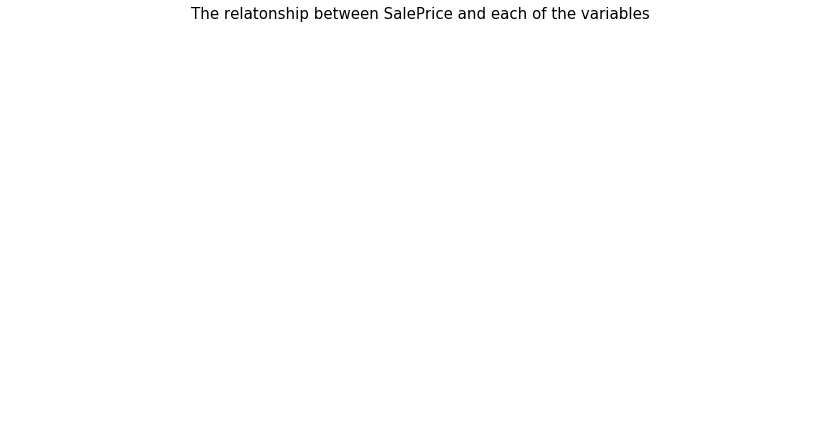

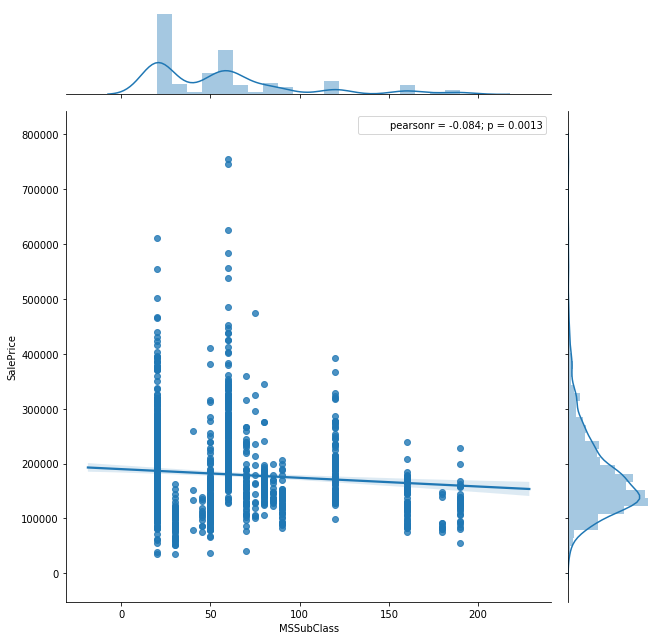

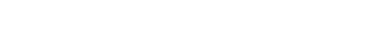

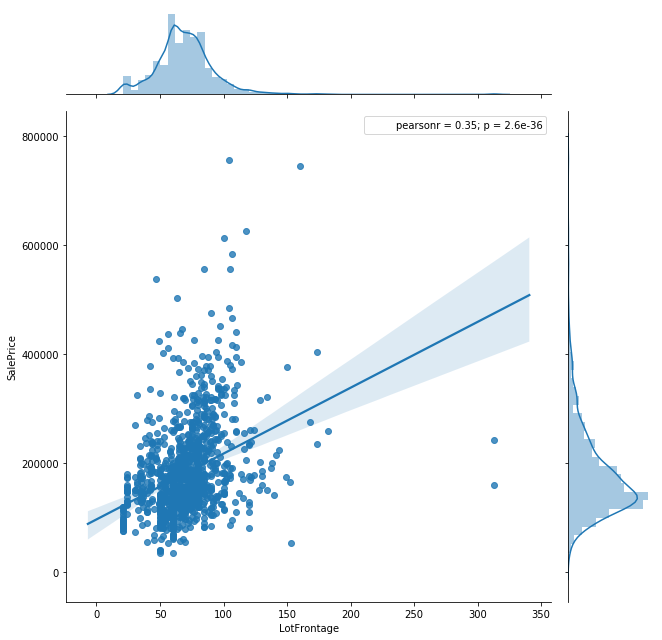

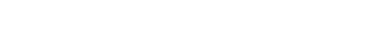

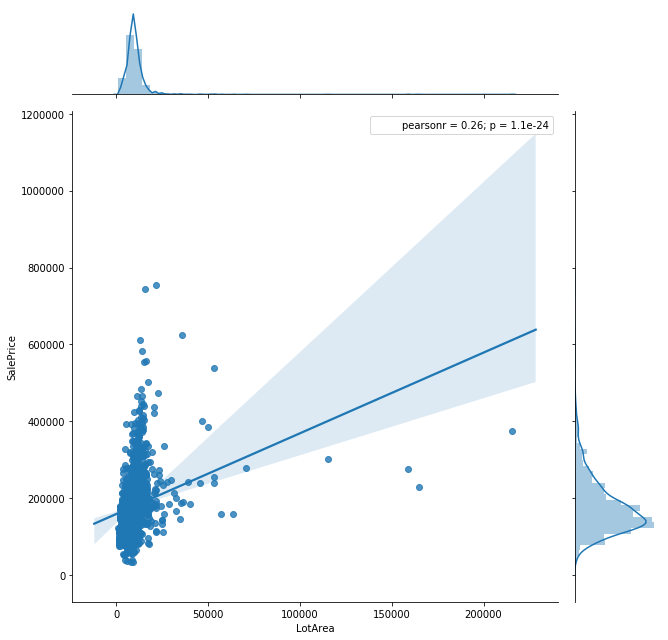

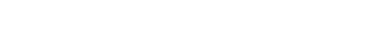

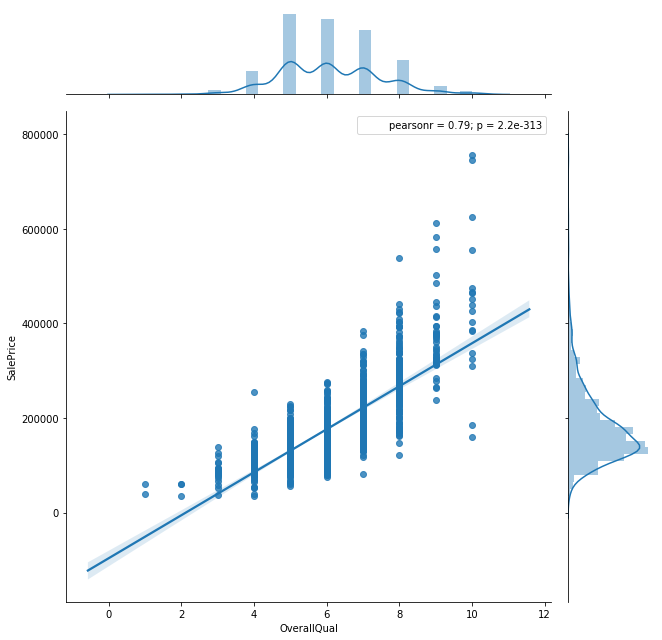

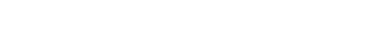

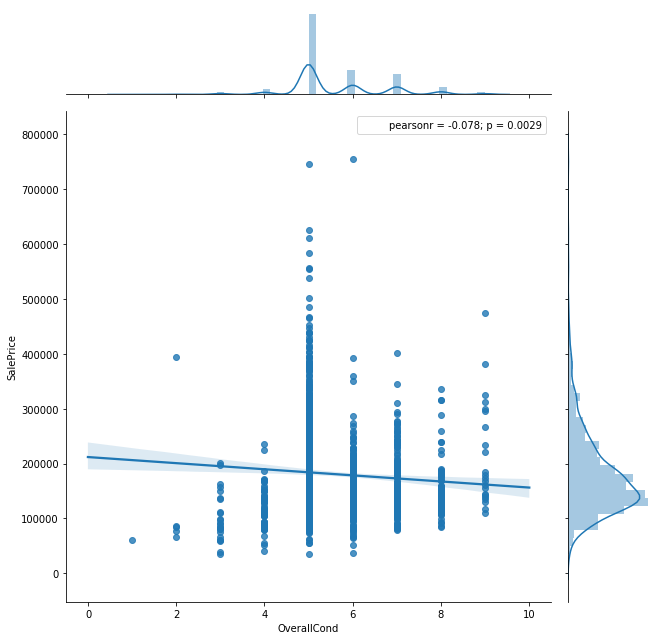

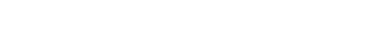

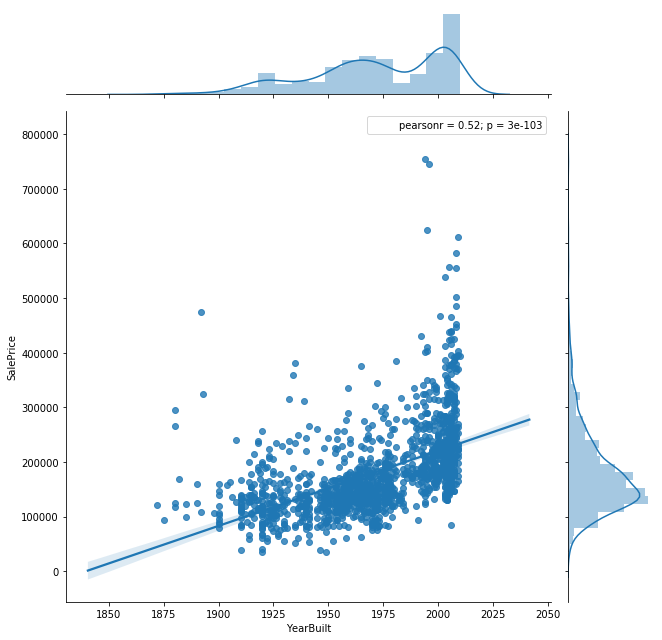

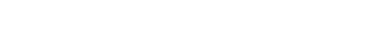

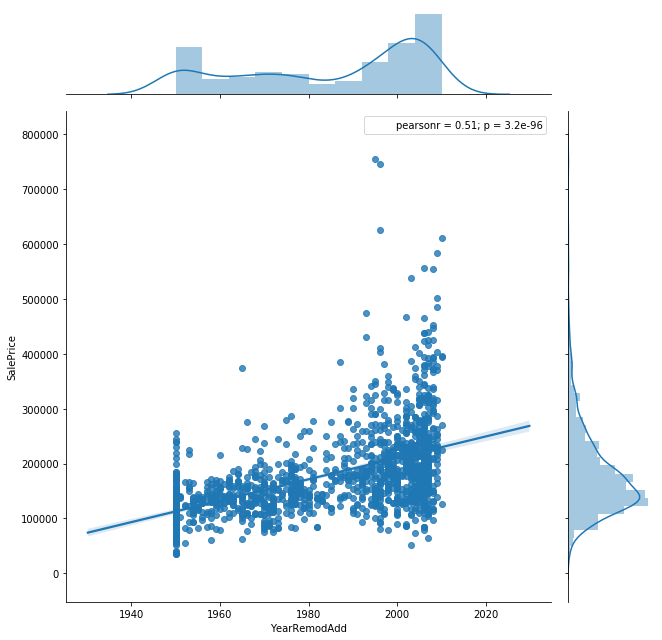

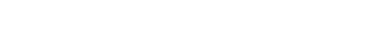

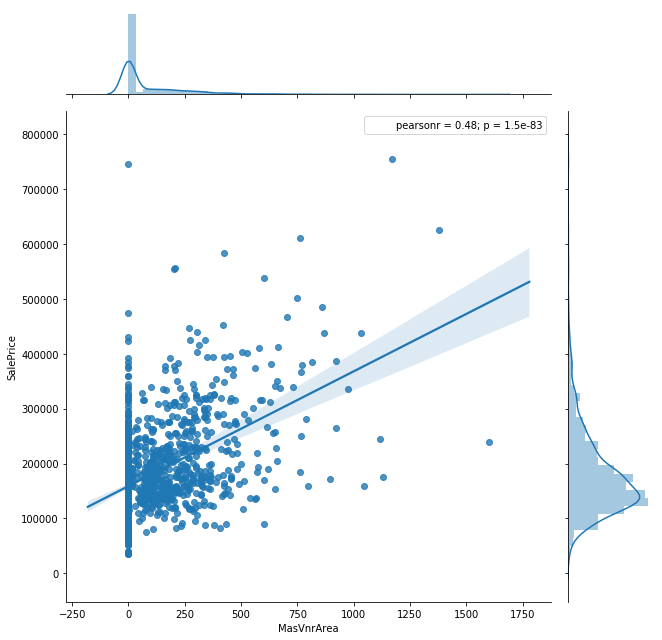

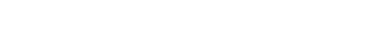

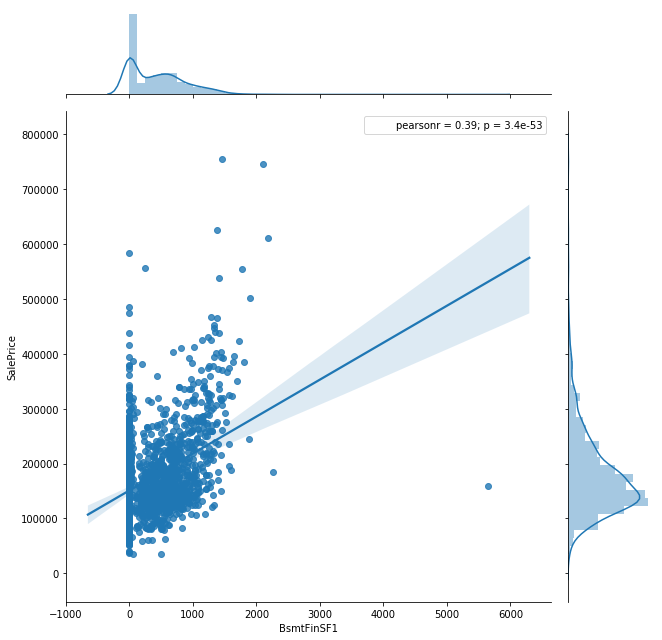

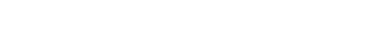

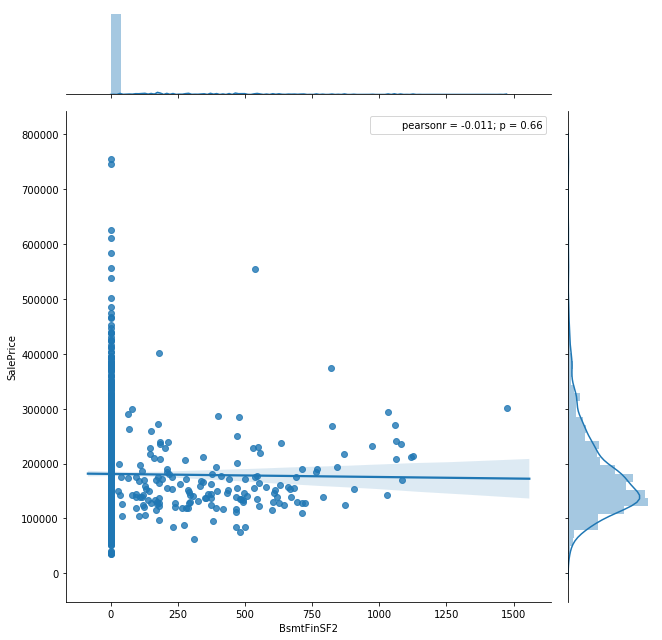

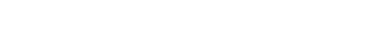

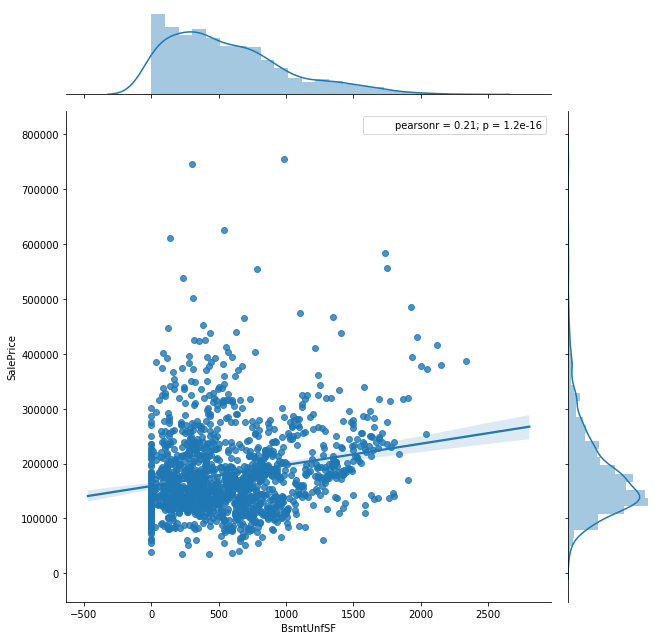

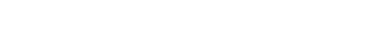

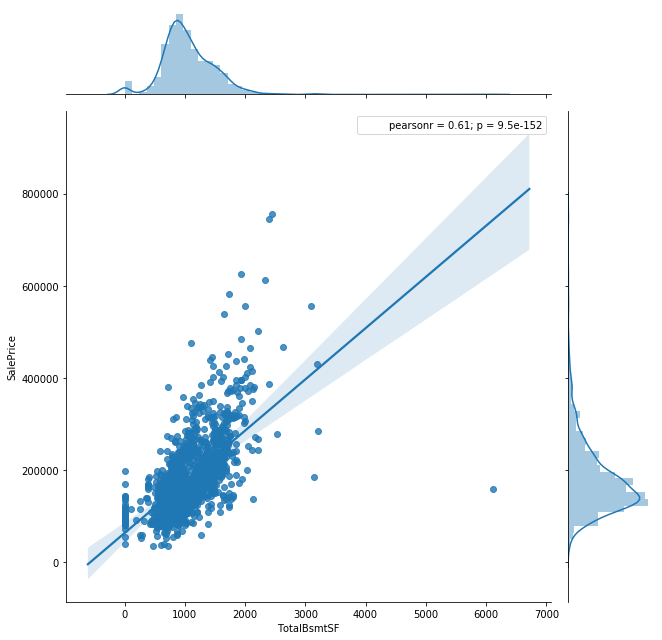

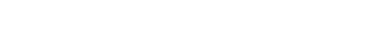

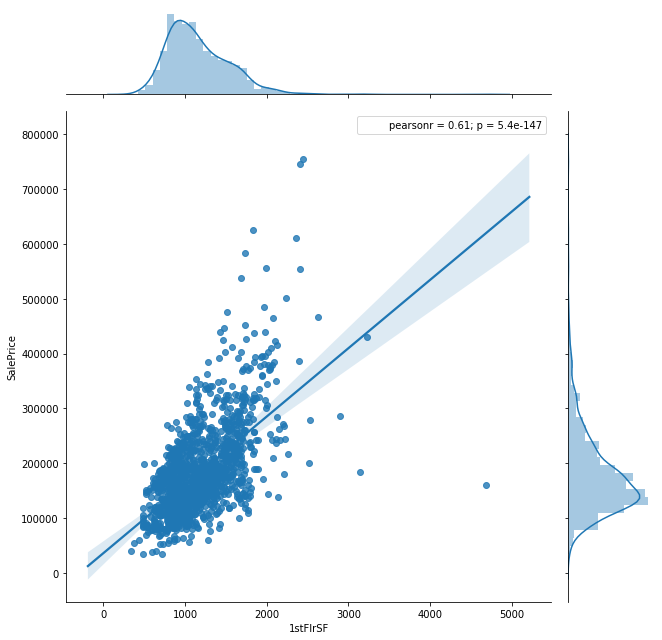

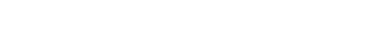

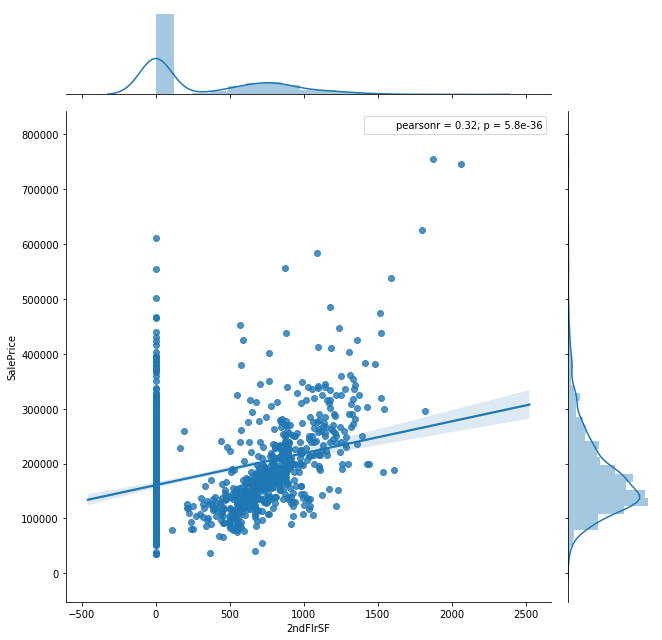

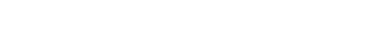

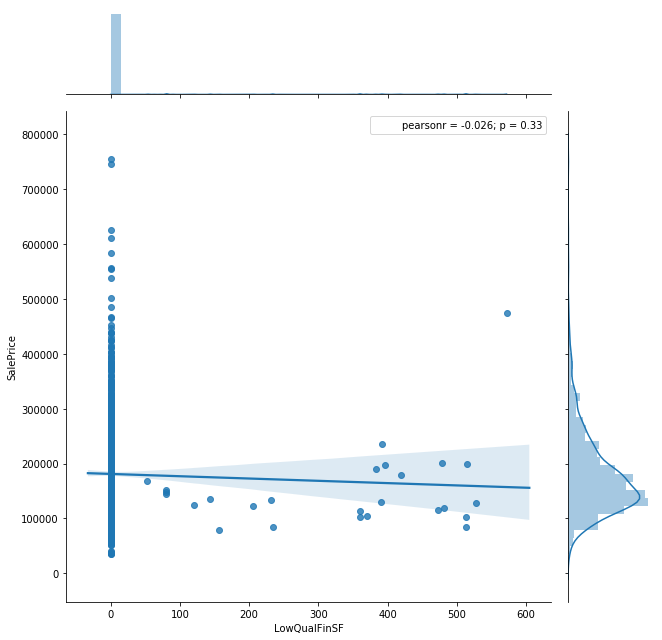

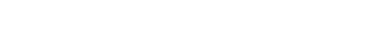

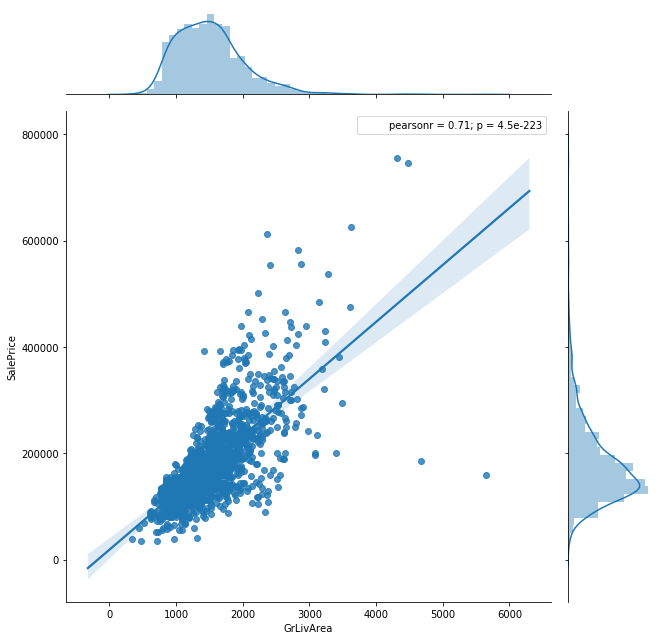

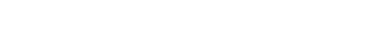

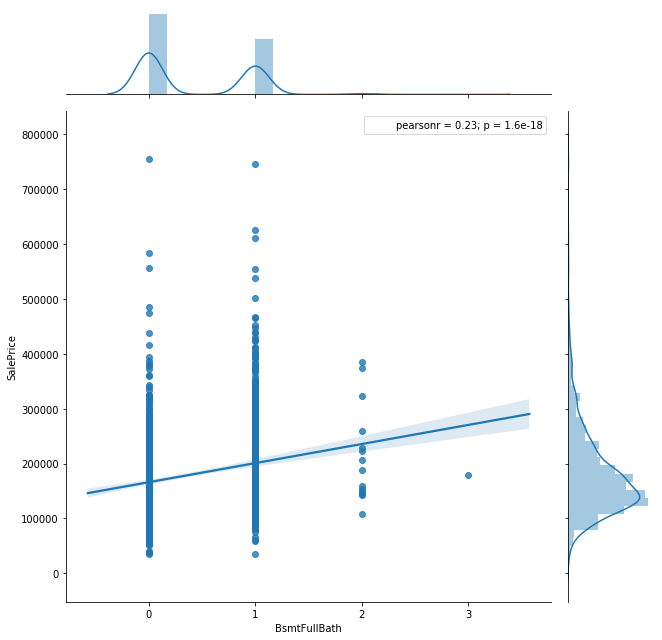

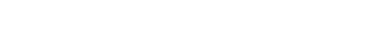

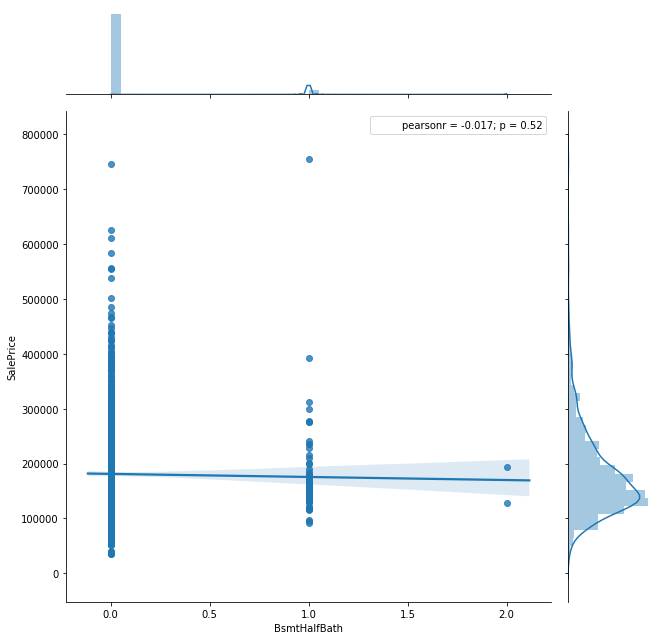

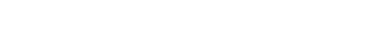

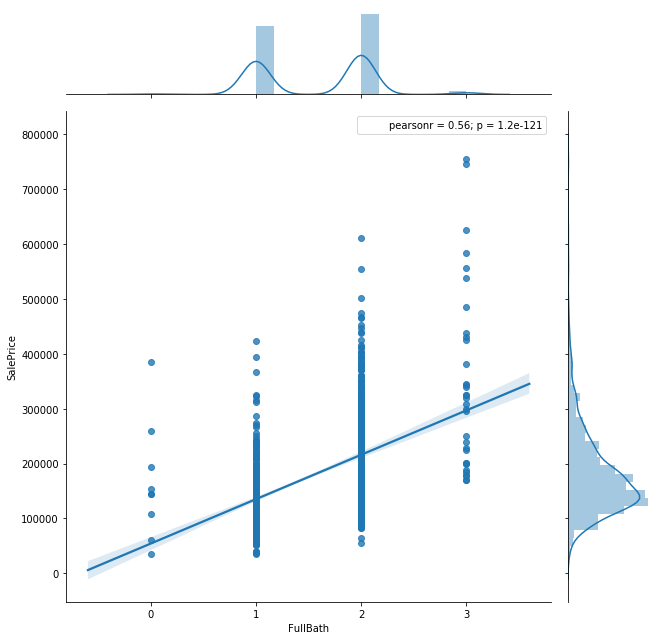

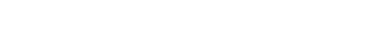

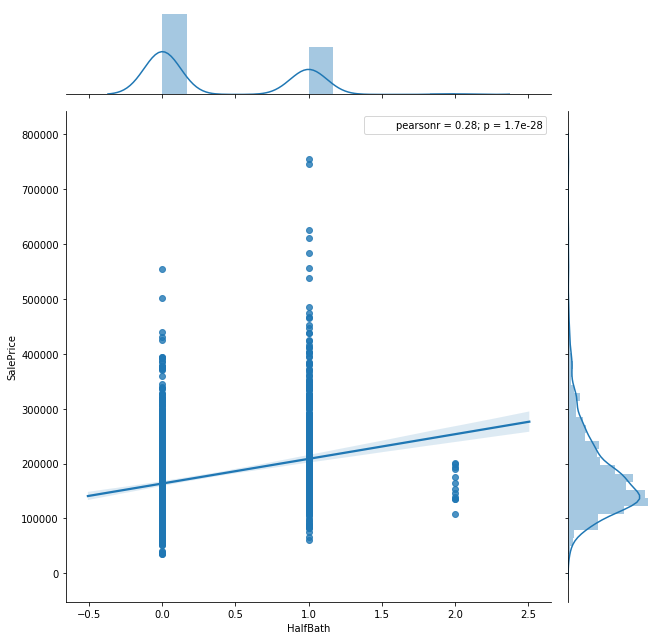

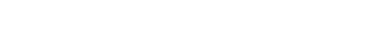

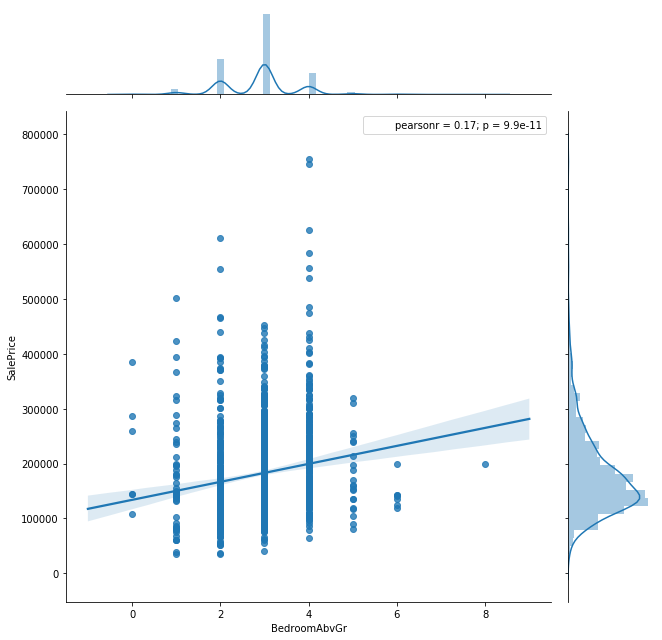

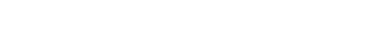

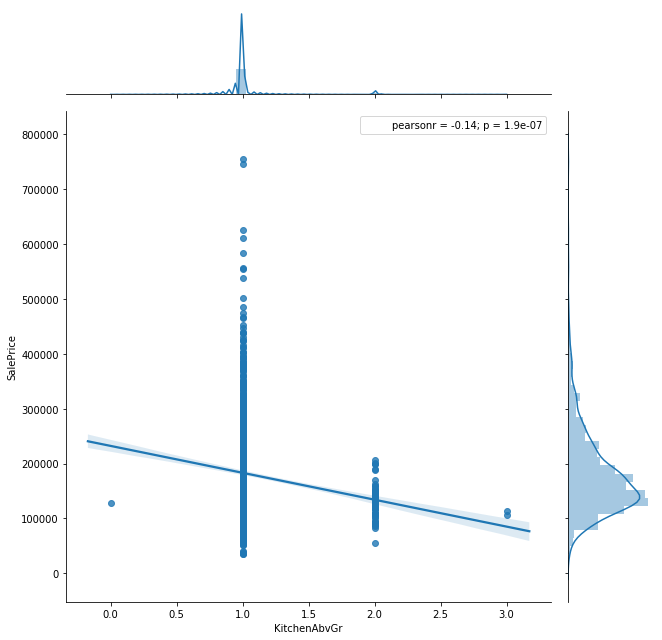

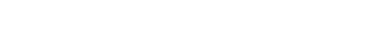

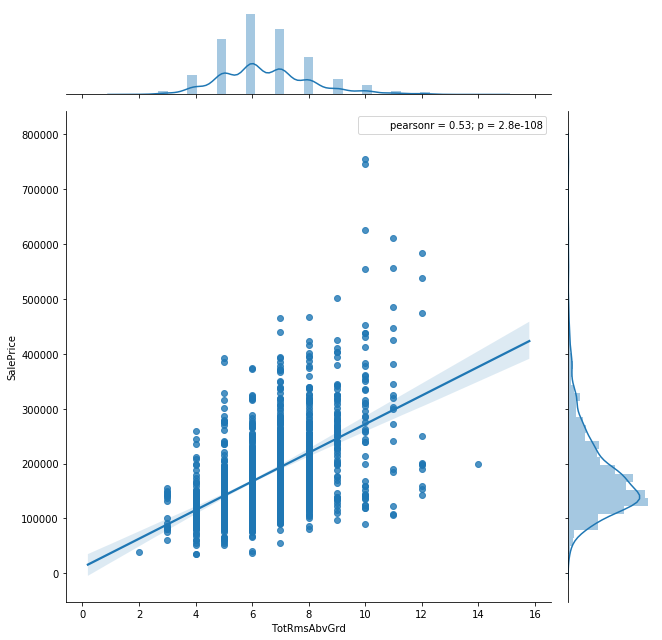

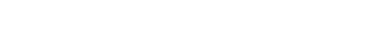

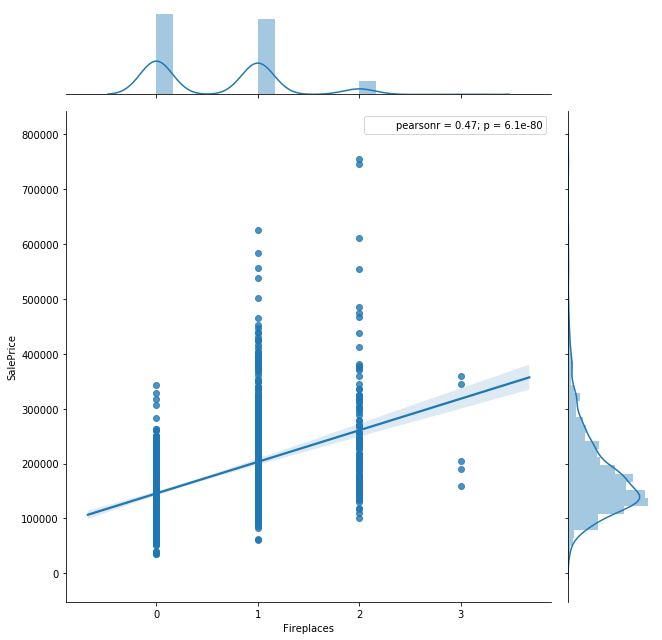

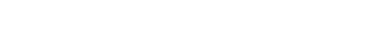

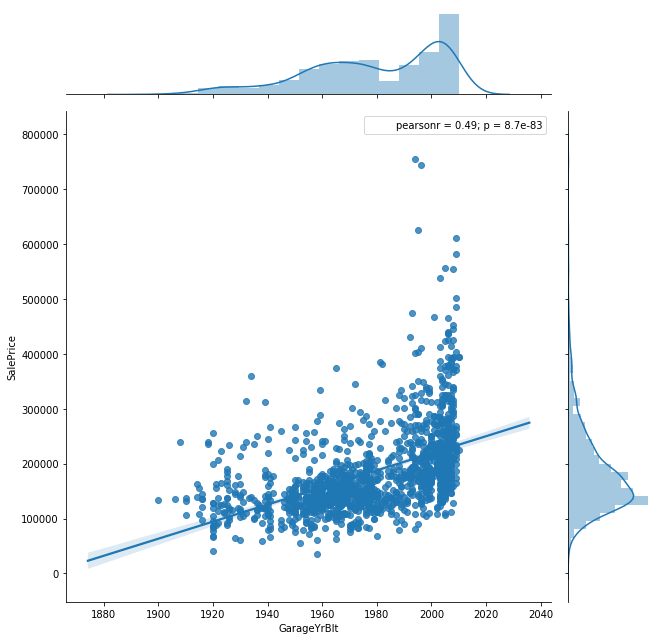

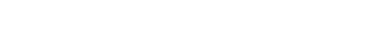

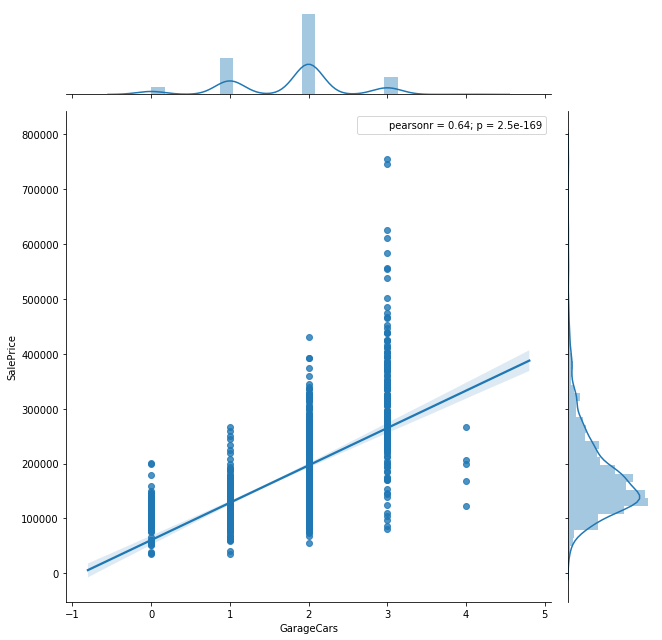

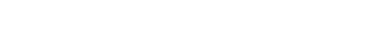

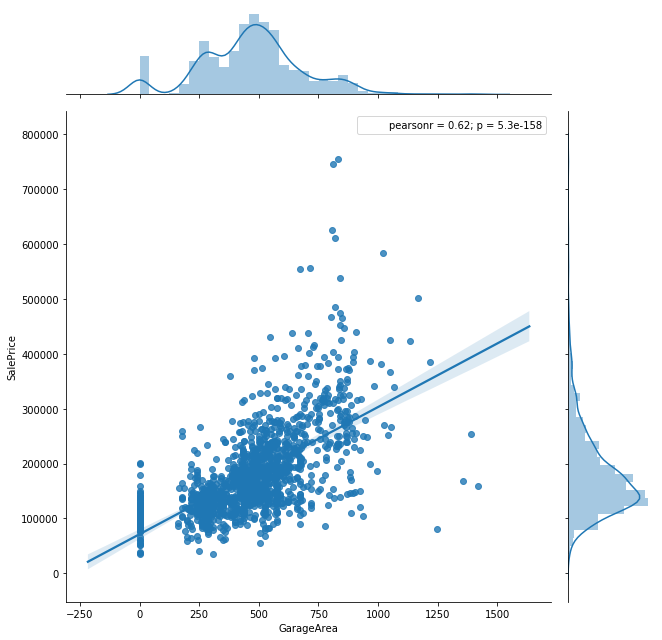

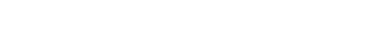

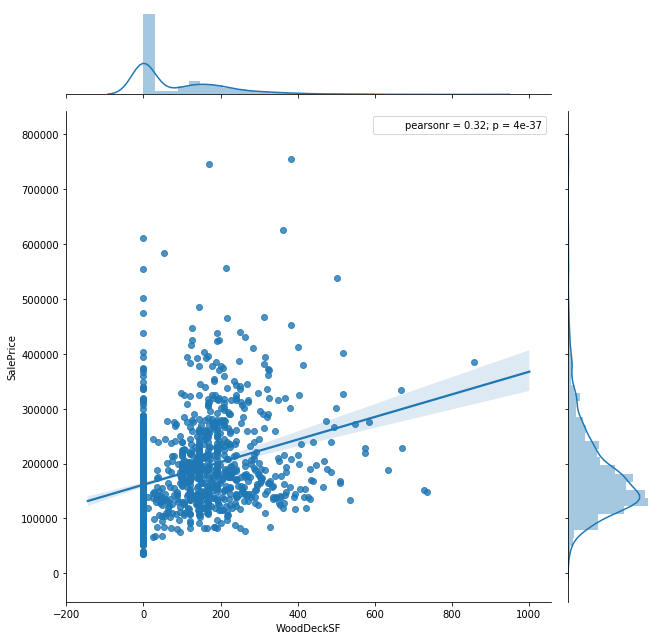

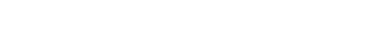

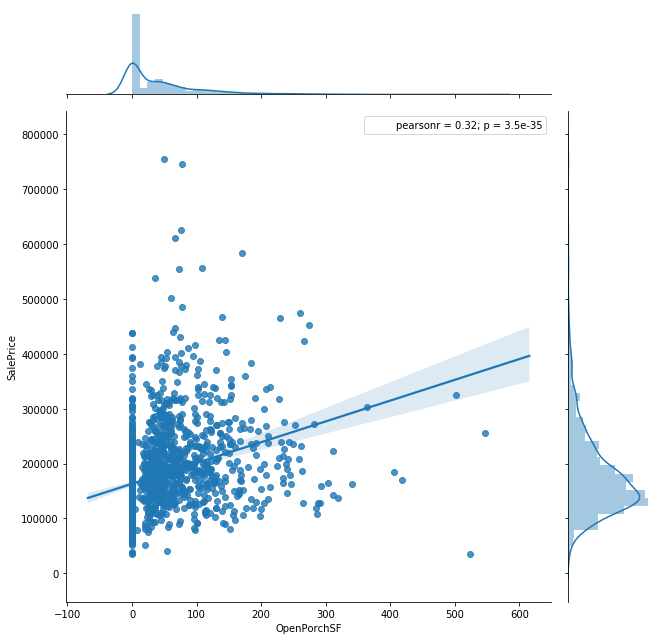

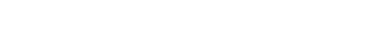

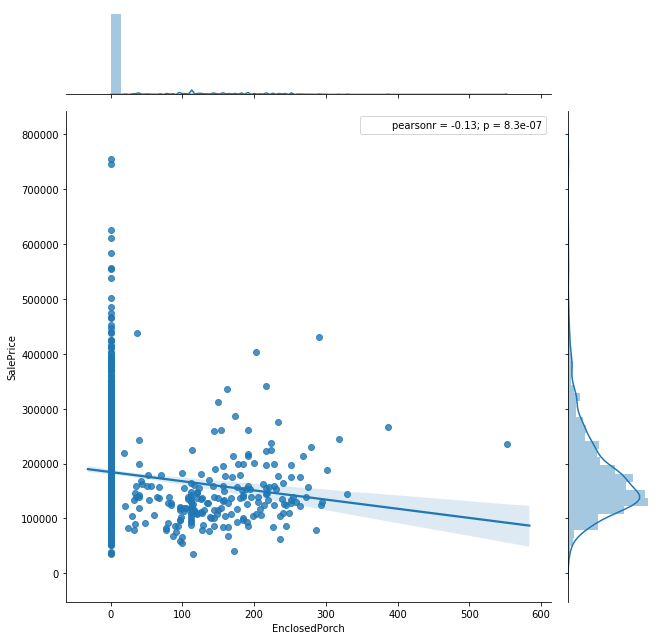

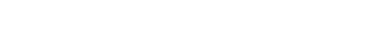

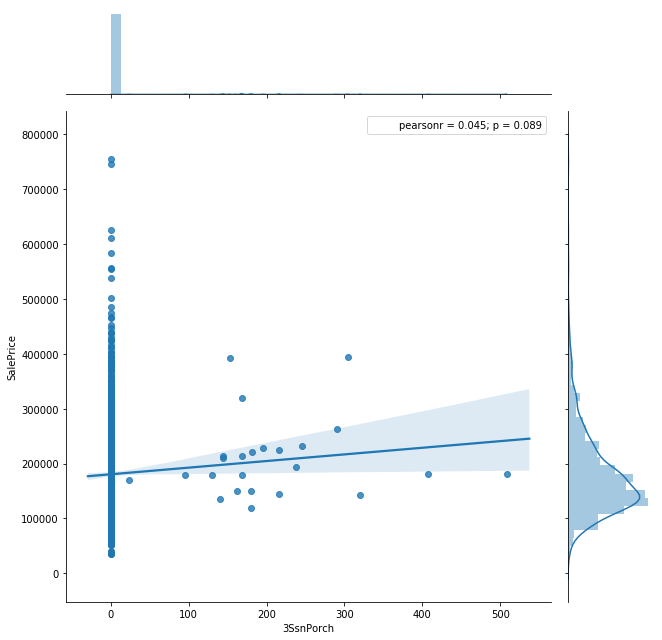

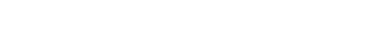

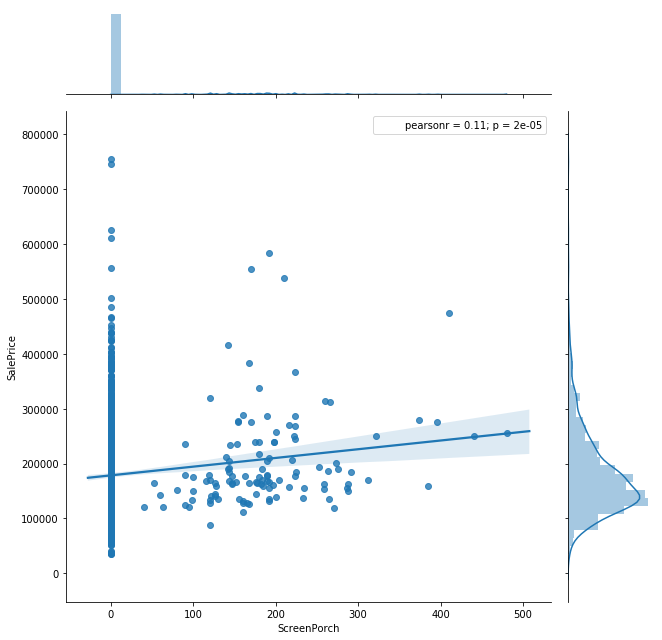

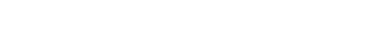

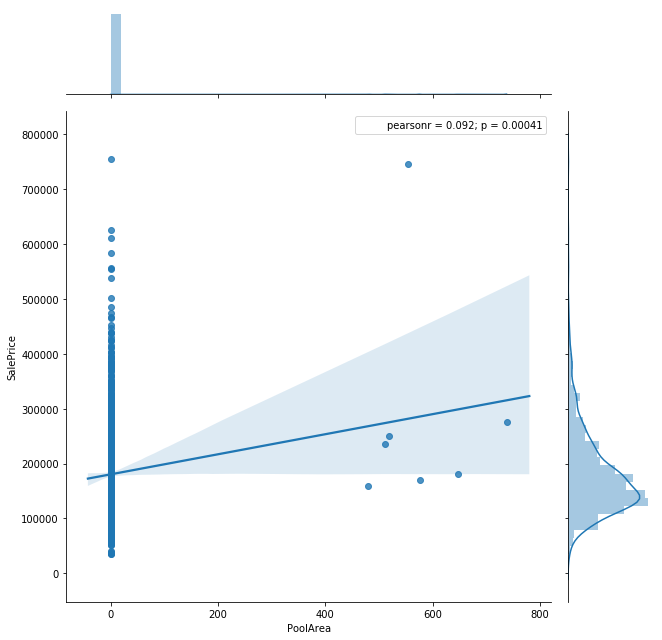

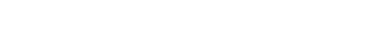

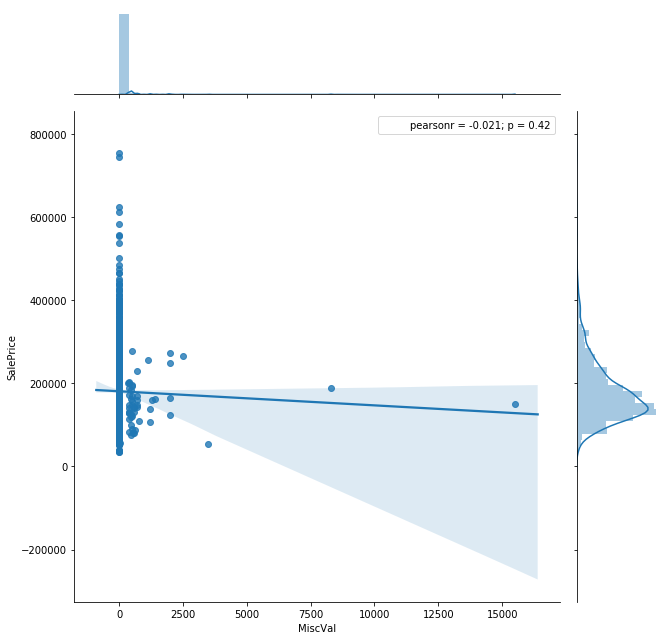

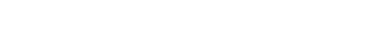

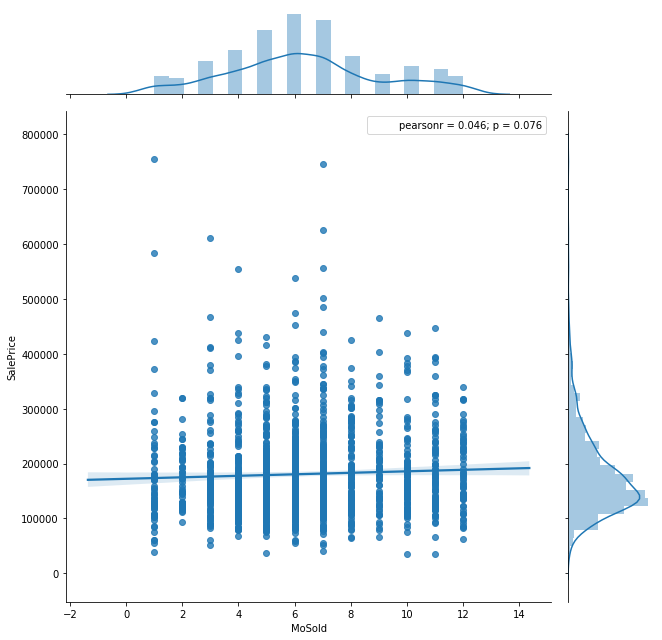

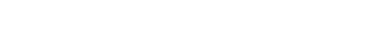

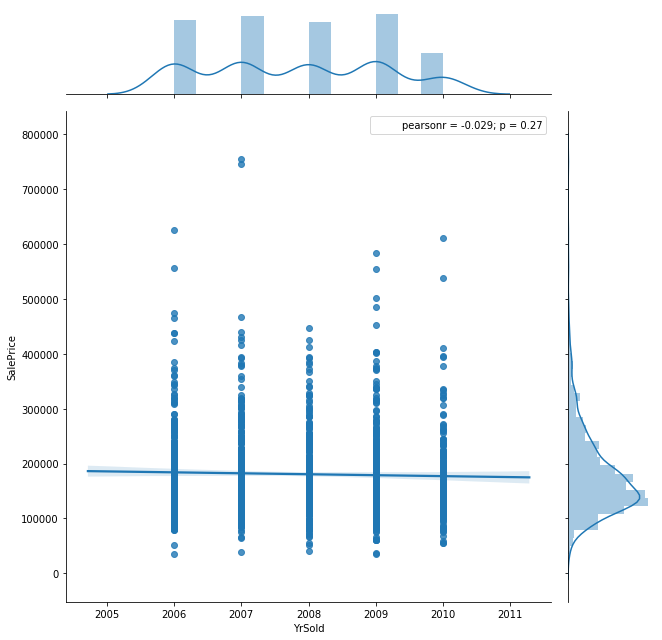

In [317]:
from scipy import stats
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

fig = plt.figure(figsize=(14, 300))
gs = gridspec.GridSpec(X_numeric.shape[1], 1)

for i in range(X_numeric.shape[1]):
    ax1 = plt.subplot(gs[i, 0])
    g = sns.jointplot(x=X_numeric.iloc[:, i],y=y,
              kind='reg',height=9)
    g = g.annotate(stats.pearsonr)
    ax1.set_axis_off()
    if i == 0:
        ax1.set_title('The relatonship between SalePrice and each of the variables', size=15)
    plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

KeyboardInterrupt: 

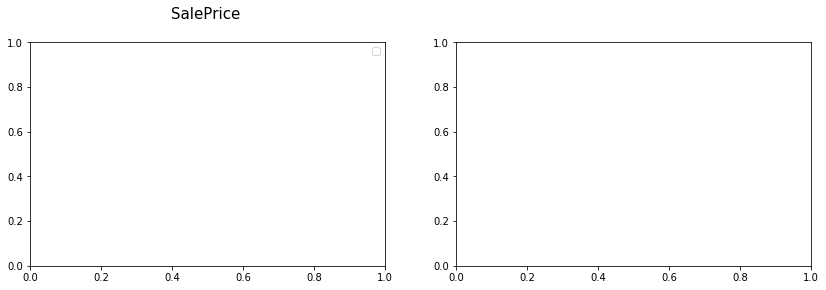

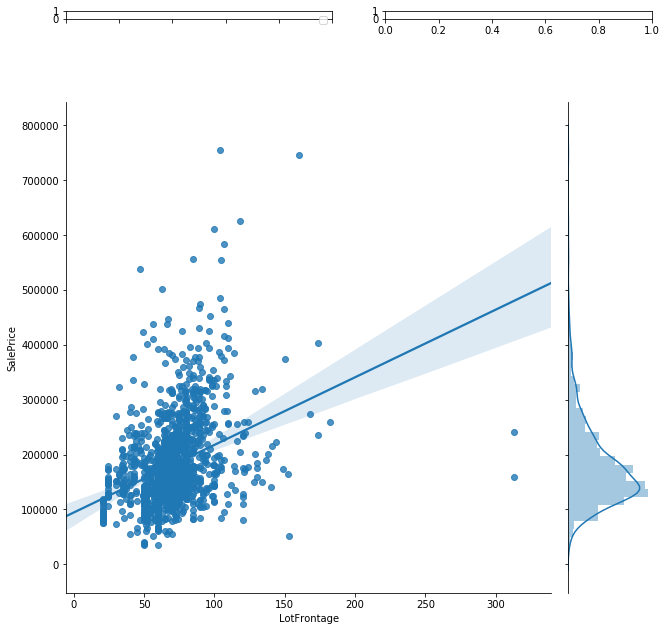

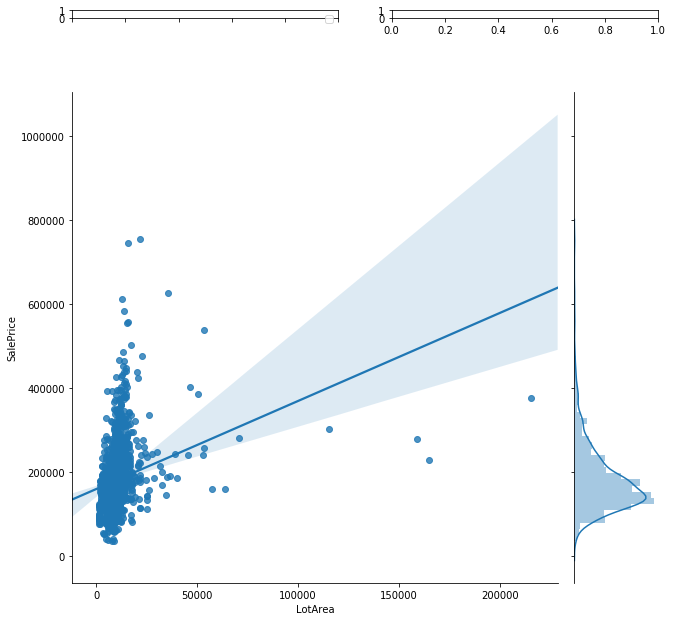

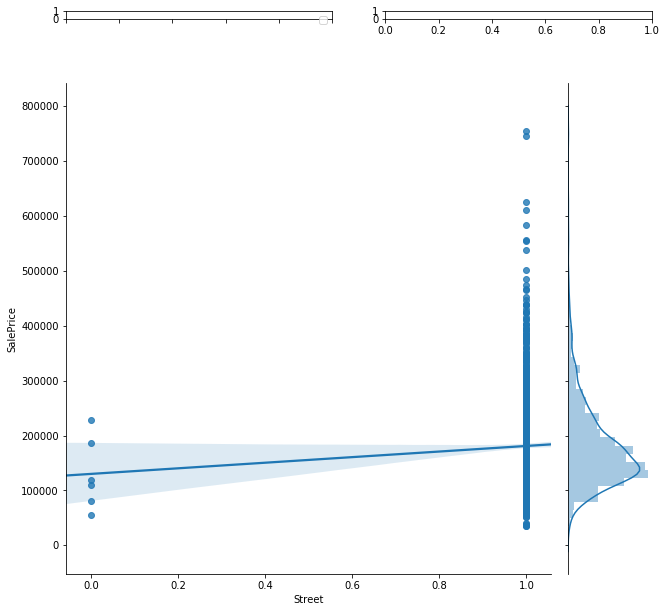

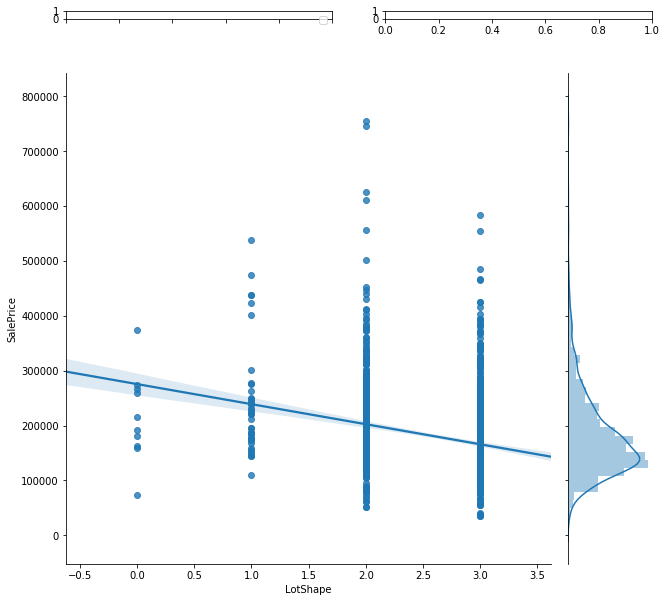

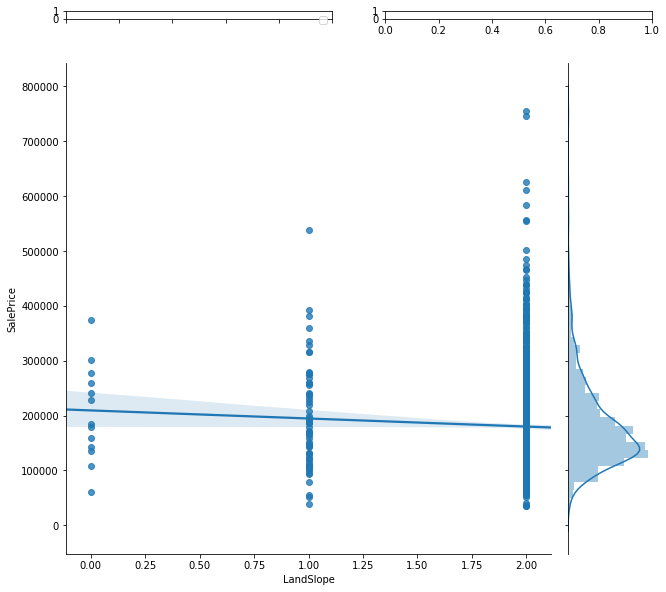

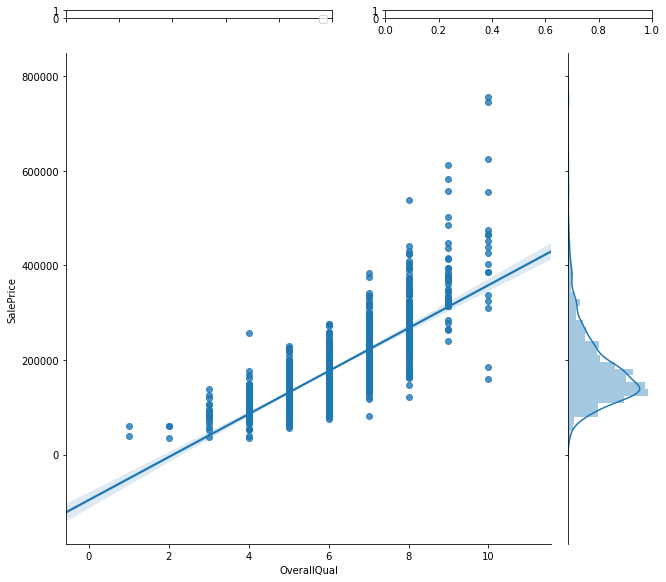

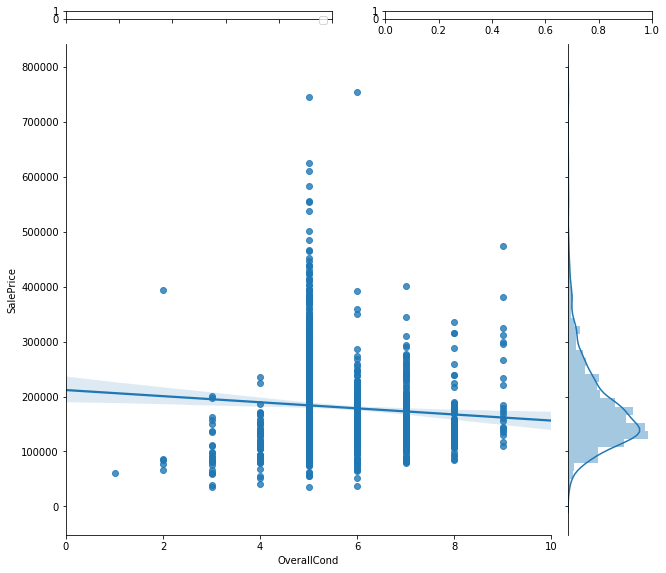

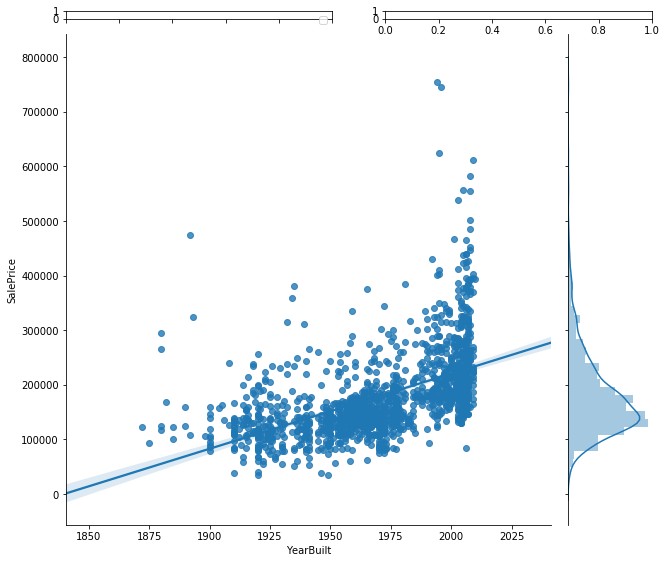

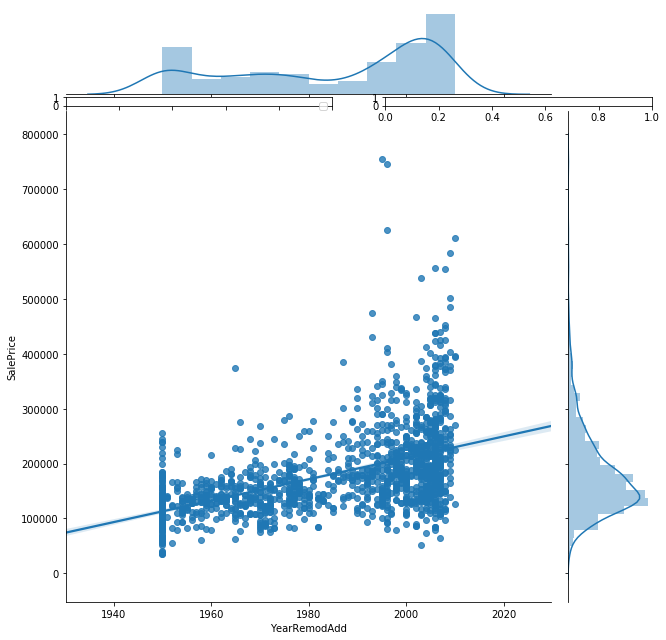

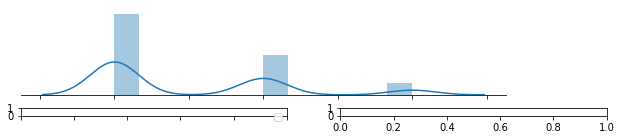

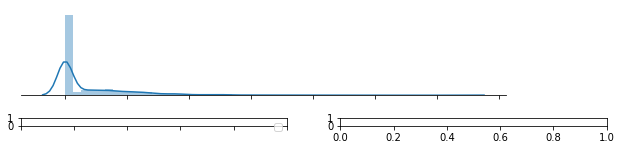

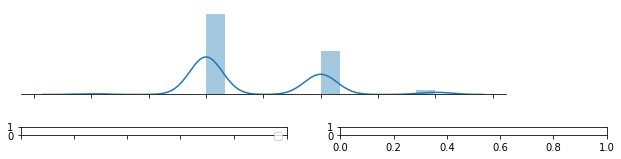

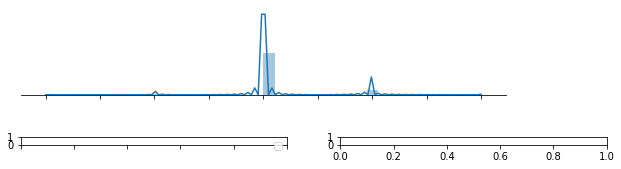

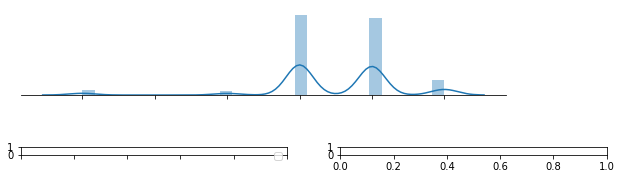

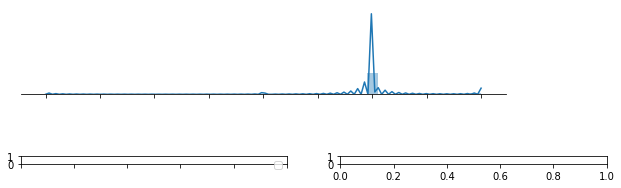

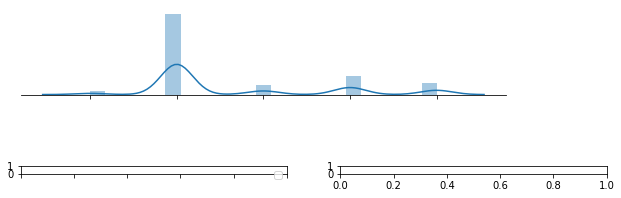

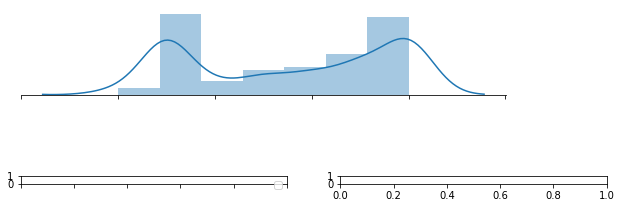

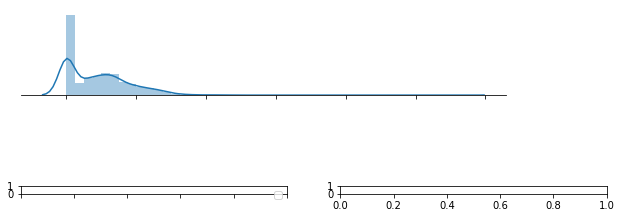

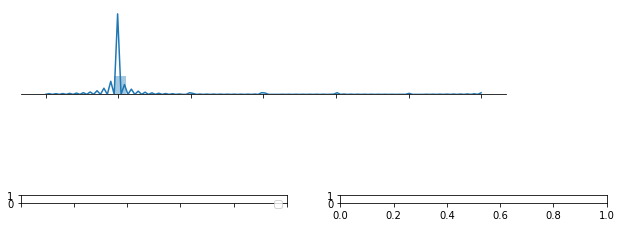

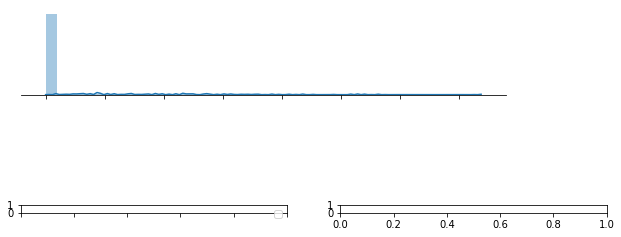

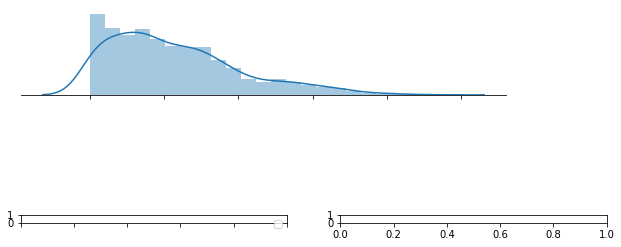

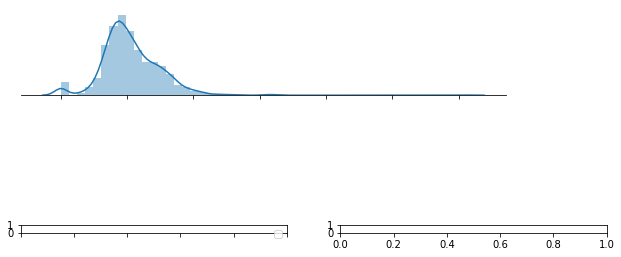

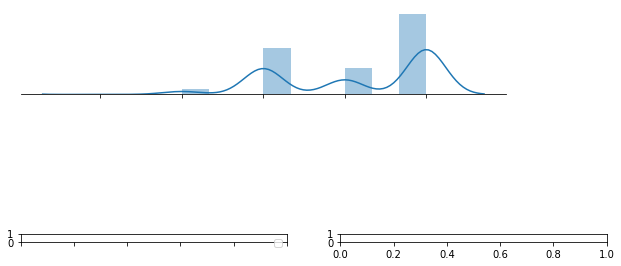

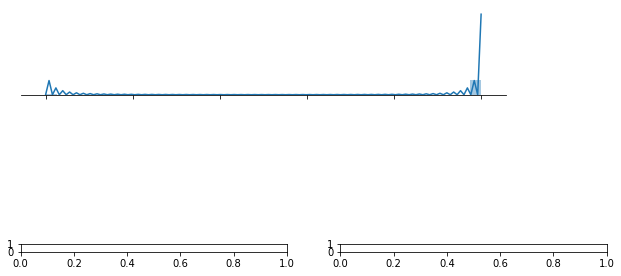

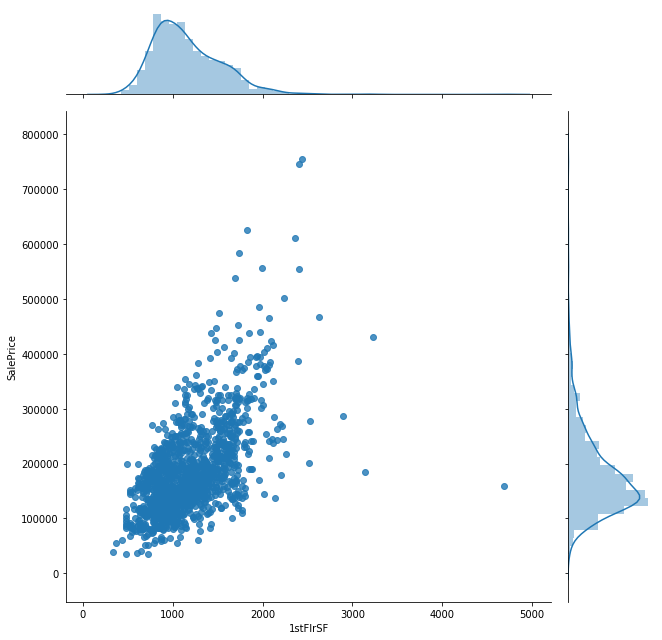

In [241]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline

fig = plt.figure(figsize=(14, 300))
gs = gridspec.GridSpec(61, 2)

for i in range(61):
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])    
    label = 'Correlation coef.: %.2f' % round(pd.concat([X_1.iloc[:, i], y_bos], axis=1).corr().iloc[0, 1], 2)
    sns.regplot(y_bos, X_1.iloc[:, i], ax=ax1,label=label)
    ax1.set_title('')
    ax1.set_xlabel('')
    ax1.legend()
    ylim = ax1.get_ylim()   
    X_1[X_1.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
    ax2.set_ylim((ylim[0], ylim[1]))
    ax2.set_xlabel('')
    ax2.set_xlim((0, 800))
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    if i != 0:
        ax1.set_xticklabels([''])
        ax2.set_xticklabels([''])
    else:
        ax1.set_title('SalePrice \n', size=15)
        ax2.set_title('count \n', size=15)
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
        for tick in ax2.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
#plt.legend()
plt.show()

### 1. VIF

In [134]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option("display.max_rows",100)

In [135]:
X = X_1.drop(['FullBath', 'BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'GrLivArea', 'TotalBsmtSF', 'OpenPorchSF',\
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

In [136]:
vif = pd.DataFrame()

vif["features"] = X.columns
vif["VIF"] = [round(variance_inflation_factor(X.values, i), 4) for i in range(X.shape[1])]

In [137]:
pd.options.display.float_format = '{:.2f}'.format
vif.sort_values('VIF', ascending=False)

features      VIF
25  LowQualFinSF      inf
24      2ndFlrSF      inf
23      1stFlrSF      inf
20     BsmtUnfSF      inf
19    BsmtFinSF2      inf
49   TotalSqFeet      inf
17    BsmtFinSF1      inf
7      YearBuilt 31502.65
8   YearRemodAdd 28334.52
33   GarageYrBlt 26394.45
2         Street   259.87
38    GarageCond   173.28
37    GarageQual   166.87
30    Functional   138.70
11     ExterQual   114.75
12     ExterCond    87.87
29  TotRmsAbvGrd    81.07
5    OverallQual    77.95
4      LandSlope    77.62
28   KitchenQual    76.28
13      BsmtQual    72.41
14      BsmtCond    71.17
6    OverallCond    50.25
35    GarageCars    40.53
27  KitchenAbvGr    38.64
36    GarageArea    35.22
21     HeatingQC    33.92
26  BedroomAbvGr    32.20
44  TotBathrooms    27.17
3       LotShape    27.01
22    CentralAir    22.54
39    PavedDrive    20.75
0    LotFrontage    17.64
48   NeighWealth    13.21
34  GarageFinish    10.54
16  BsmtFinType1    10.11
32   FireplaceQu     9.47
31    Fireplaces     8.71
18  BsmtFinType2     8.69
46           Age     7.63
15  BsmtExposure     5.27
42        PoolQC     4.34
41      PoolArea     4.27
1        LotArea     4.17
45         Remod     3.12
9     MasVnrType     2.96
10    MasVnrArea     2.58
50  TotalPorchSF     2.08
40    WoodDeckSF     1.96
47         IsNew     1.24
43       MiscVal     1.06

### 2. Removing features with low variance

In [138]:
all_variables = pd.concat([X_1, X_2], 1).head()

In [139]:
np.var(all_variables, 0).sort_values()

PoolQC                0.00
CentralAir            0.00
BsmtFinSF2            0.00
BsmtFinType2          0.00
MiscVal               0.00
ScreenPorch           0.00
3SsnPorch             0.00
ExterCond             0.00
PoolArea              0.00
PavedDrive            0.00
LowQualFinSF          0.00
IsNew                 0.00
KitchenAbvGr          0.00
LandSlope             0.00
Functional            0.00
Street                0.00
GarageQual            0.00
GarageCond            0.00
BedroomAbvGr          0.16
BsmtQual              0.16
BsmtCond              0.16
KitchenQual           0.16
HeatingQC             0.16
FullBath              0.16
NeighWealth           0.16
GarageFinish          0.16
Fireplaces            0.16
BsmtFullBath          0.16
BsmtHalfBath          0.16
GarageCars            0.24
ExterQual             0.24
LotShape              0.24
BsmtFinType1          0.24
MasVnrType            0.24
HalfBath              0.24
Remod                 0.24
OverallQual           0.40
T

In [238]:
import sklearn.feature_selection as fs


### 3. Univariate Feature Selection

In [240]:
fs.chi2(X_1, y_bos)

ValueError: Input X must be non-negative.

### 4. Regularization

In [183]:
full_dt = X_1.merge(y_bos.to_frame(), how='left', left_index=True, right_index=True)

In [189]:
train_x = full_dt[full_dt.SalePrice.notnull()].drop(['SalePrice'], 1)
train_y = full_dt[full_dt.SalePrice.notnull()].SalePrice

In [235]:
# For R analysis
full_dt[full_dt.SalePrice.notnull()].to_csv('data_after_preproc.csv')

In [204]:
import sklearn.datasets
import sklearn.cross_validation as cv
from sklearn import linear_model

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [190]:
# Ridge
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(train_x, train_y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([-6.36933229e+01,  3.88244128e-01,  1.10227971e+04, -2.08683296e+02,
        -4.88735767e+03,  1.02459410e+04,  5.50727869e+03,  2.58468773e+02,
        -3.90250542e+02, -4.21455557e+03,  2.61417162e+01,  9.38510080e+03,
        -2.77576557e+03,  7.40515617e+03, -8.63580827e+03,  5.07782273e+03,
         1.13130781e+03, -1.95662638e-02, -1.19823022e+03,  4.05475638e+00,
        -5.95888606e+00, -1.92369302e+00,  1.34157835e+03, -4.69121556e+02,
         1.86729253e+01,  5.86584057e+00, -1.06697951e+01,  1.38689630e+01,
         9.25510227e+02, -2.50070397e+03,  1.31430906e+03,  2.37902390e+03,
        -4.17468742e+03, -2.43512889e+04,  8.97229434e+03,  5.45247937e+03,
         5.18381432e+03,  4.70456413e+03, -3.25128007e+02, -9.49086249e+01,
         9.52041052e+02,  8.62943007e+03,  1.87542016e+01,  4.89701668e+03,
        -1.00606769e+04,  5.52559399e+02,  1.77137985e+01, -2.02973031e+01,
        -1.13868197e+01,  1.66796673e+01,  3.22388040e+01, -1.38841771e+01,
        -4.7

In [191]:
ridge.score(train_x, train_y)

0.8429594752380949

In [222]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(train_x, train_y)
    coef.append(ridge.coef_)

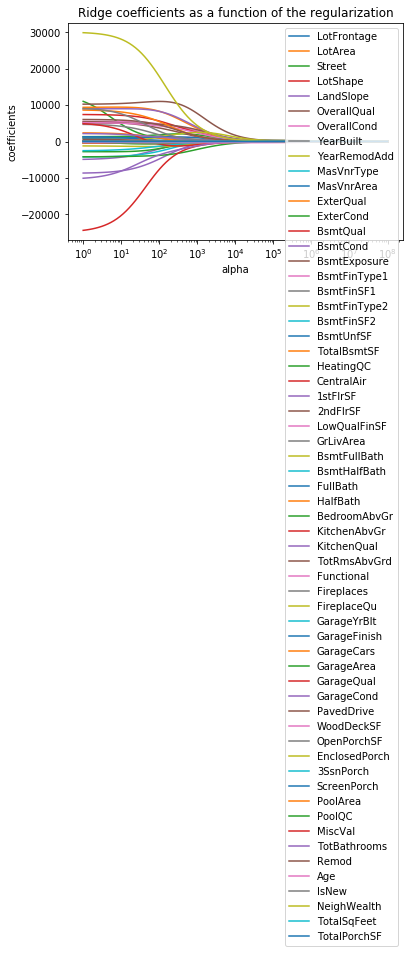

In [223]:
df_coef = pd.DataFrame(coef, index=alpha_100, columns=train_x.columns)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [224]:
alphas = np.logspace(-10, 8, 100)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(train_x, train_y)
    scores[i] = lasso.score(train_x, train_y)
    print(a, lasso.coef_)

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-10 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775735e+04  4.79572972e+03  1.60140347e+04  9.74127163e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365382e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082671e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7.64628139e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.310129700083158e-10 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775735e+04  4.79572972e+03  1.60140347e+04  9.74127163e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365382e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082671e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5.336699231206302e-10 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775735e+04  4.79572972e+03  1.60140347e+04  9.74127163e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365382e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082671e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.873817422860387e-09 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571666e+00
  1.55775734e+04  4.79572972e+03  1.60140347e+04  9.74127162e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663340e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365381e+01
 -7.07488734e+01 -4.26628372e+01 -2.70198315e+01 -1.41349539e+01
  3.74082669e+01  6.58114083e-01 -1.24533713e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-08 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775734e+04  4.79572969e+03  1.60140346e+04  9.74127160e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365381e+01
 -7.07488733e+01 -4.26628371e+01 -2.70198315e+01 -1.41349539e+01
  3.74082659e+01  6.58114083e-01 -1.24533712e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7.64628139e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.310129700083158e-08 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714391e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775733e+04  4.79572965e+03  1.60140345e+04  9.74127156e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073368e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365380e+01
 -7.07488733e+01 -4.26628371e+01 -2.70198314e+01 -1.41349539e+01
  3.74082642e+01  6.58114083e-01 -1.24533712e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5.3366992312063125e-08 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543899e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714390e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775731e+04  4.79572956e+03  1.60140343e+04  9.74127146e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073367e+02 -9.52077575e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334299e+02  1.76692138e+01 -7.95365379e+01
 -7.07488731e+01 -4.26628369e+01 -2.70198312e+01 -1.41349539e+01
  3.74082603e+01  6.58114083e-01 -1.24533710e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471038e+01
  

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.232846739442066e-07 [-6.46482848e+01  3.89348783e-01  1.30760860e+04 -1.90119146e+02
 -4.98500491e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543898e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660020e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714388e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775727e+04  4.79572934e+03  1.60140339e+04  9.74127125e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798459e+03 -3.55073367e+02 -9.52077574e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663339e+03
 -1.03552748e+04  5.61334298e+02  1.76692138e+01 -7.95365375e+01
 -7.07488727e+01 -4.26628365e+01 -2.70198308e+01 -1.41349538e+01
  3.74082514e+01  6.58114083e-01 -1.24533705e+04  6.06272797e+03
 -2.00422048e+02  9.27792975e+03  3.00406819e+04 -3.89471039e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.848035868435805e-07 [-6.46482848e+01  3.89348783e-01  1.30760859e+04 -1.90119146e+02
 -4.98500490e+03  1.02187565e+04  5.50183088e+03  2.57749139e+02
 -3.26642197e+02 -4.24543898e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660019e+03 -8.69065272e+03  5.09462890e+03
  1.12594829e+03  3.24367712e+01 -1.17934713e+03  3.64314804e+01
  2.65150690e+01  1.64773960e+01  1.34110803e+03 -5.10714384e+02
  7.57536189e+01  6.28690192e+01  4.62603743e+01  7.60571667e+00
  1.55775717e+04  4.79572884e+03  1.60140329e+04  9.74127075e+03
 -4.17939045e+03 -2.49327349e+04  8.96427033e+03  5.49636811e+03
  5.21308447e+03  4.75798458e+03 -3.55073366e+02 -9.52077574e+01
  9.39976982e+02  8.71057714e+03  1.86771278e+01  5.15663338e+03
 -1.03552748e+04  5.61334297e+02  1.76692138e+01 -7.95365366e+01
 -7.07488718e+01 -4.26628356e+01 -2.70198300e+01 -1.41349537e+01
  3.74082308e+01  6.58114082e-01 -1.24533695e+04  6.06272797e+03
 -2.00422048e+02  9.27792974e+03  3.00406819e+04 -3.89471039e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-06 [-6.46482847e+01  3.89348783e-01  1.30760858e+04 -1.90119145e+02
 -4.98500489e+03  1.02187565e+04  5.50183087e+03  2.57749138e+02
 -3.26642196e+02 -4.24543898e+03  2.61398939e+01  9.36077558e+03
 -2.76263762e+03  7.42660019e+03 -8.69065271e+03  5.09462890e+03
  1.12594828e+03  3.24367713e+01 -1.17934713e+03  3.64314805e+01
  2.65150691e+01  1.64773960e+01  1.34110803e+03 -5.10714367e+02
  7.57536190e+01  6.28690193e+01  4.62603745e+01  7.60571669e+00
  1.55775673e+04  4.79572663e+03  1.60140285e+04  9.74126855e+03
 -4.17939045e+03 -2.49327348e+04  8.96427034e+03  5.49636811e+03
  5.21308447e+03  4.75798457e+03 -3.55073360e+02 -9.52077571e+01
  9.39976984e+02  8.71057714e+03  1.86771278e+01  5.15663334e+03
 -1.03552748e+04  5.61334292e+02  1.76692138e+01 -7.95365327e+01
 -7.07488679e+01 -4.26628317e+01 -2.70198261e+01 -1.41349532e+01
  3.74081394e+01  6.58114080e-01 -1.24533651e+04  6.06272796e+03
 -2.00422047e+02  9.27792972e+03  3.00406819e+04 -3.89471040e+01
  7.64628084e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

3.5111917342151347e-06 [-6.46482844e+01  3.89348783e-01  1.30760851e+04 -1.90119142e+02
 -4.98500483e+03  1.02187565e+04  5.50183087e+03  2.57749138e+02
 -3.26642194e+02 -4.24543897e+03  2.61398939e+01  9.36077558e+03
 -2.76263760e+03  7.42660016e+03 -8.69065269e+03  5.09462890e+03
  1.12594828e+03  3.24367717e+01 -1.17934713e+03  3.64314807e+01
  2.65150694e+01  1.64773963e+01  1.34110802e+03 -5.10714304e+02
  7.57536194e+01  6.28690198e+01  4.62603750e+01  7.60571676e+00
  1.55775518e+04  4.79571887e+03  1.60140130e+04  9.74126081e+03
 -4.17939045e+03 -2.49327347e+04  8.96427035e+03  5.49636810e+03
  5.21308445e+03  4.75798453e+03 -3.55073339e+02 -9.52077561e+01
  9.39976989e+02  8.71057712e+03  1.86771278e+01  5.15663321e+03
 -1.03552747e+04  5.61334275e+02  1.76692138e+01 -7.95365188e+01
 -7.07488541e+01 -4.26628179e+01 -2.70198124e+01 -1.41349512e+01
  3.74078186e+01  6.58114072e-01 -1.24533497e+04  6.06272795e+03
 -2.00422045e+02  9.27792964e+03  3.00406819e+04 -3.89471045e+01
  

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.873817422860383e-05 [-6.46482824e+01  3.89348782e-01  1.30760811e+04 -1.90119127e+02
 -4.98500451e+03  1.02187565e+04  5.50183083e+03  2.57749133e+02
 -3.26642178e+02 -4.24543892e+03  2.61398938e+01  9.36077556e+03
 -2.76263749e+03  7.42660002e+03 -8.69065254e+03  5.09462891e+03
  1.12594827e+03  3.24367737e+01 -1.17934709e+03  3.64314824e+01
  2.65150712e+01  1.64773975e+01  1.34110797e+03 -5.10713925e+02
  7.57536219e+01  6.28690225e+01  4.62603781e+01  7.60571720e+00
  1.55774581e+04  4.79567180e+03  1.60139193e+04  9.74121388e+03
 -4.17939042e+03 -2.49327342e+04  8.96427045e+03  5.49636806e+03
  5.21308438e+03  4.75798430e+03 -3.55073213e+02 -9.52077500e+01
  9.39977022e+02  8.71057700e+03  1.86771280e+01  5.15663240e+03
 -1.03552738e+04  5.61334173e+02  1.76692137e+01 -7.95364350e+01
 -7.07487707e+01 -4.26627342e+01 -2.70197293e+01 -1.41349392e+01
  3.74058733e+01  6.58114021e-01 -1.24532560e+04  6.06272785e+03
 -2.00422032e+02  9.27792917e+03  3.00406817e+04 -3.89471075e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4.328761281083062e-05 [-6.46482792e+01  3.89348781e-01  1.30760747e+04 -1.90119101e+02
 -4.98500399e+03  1.02187565e+04  5.50183076e+03  2.57749127e+02
 -3.26642153e+02 -4.24543882e+03  2.61398936e+01  9.36077553e+03
 -2.76263731e+03  7.42659978e+03 -8.69065229e+03  5.09462892e+03
  1.12594825e+03  3.24367769e+01 -1.17934704e+03  3.64314851e+01
  2.65150742e+01  1.64773996e+01  1.34110789e+03 -5.10713315e+02
  7.57536258e+01  6.28690268e+01  4.62603831e+01  7.60571789e+00
  1.55773069e+04  4.79559591e+03  1.60137682e+04  9.74113822e+03
 -4.17939037e+03 -2.49327333e+04  8.96427060e+03  5.49636800e+03
  5.21308427e+03  4.75798392e+03 -3.55073011e+02 -9.52077402e+01
  9.39977074e+02  8.71057681e+03  1.86771283e+01  5.15663110e+03
 -1.03552725e+04  5.61334007e+02  1.76692137e+01 -7.95362998e+01
 -7.07486361e+01 -4.26625993e+01 -2.70195954e+01 -1.41349199e+01
  3.74027371e+01  6.58113941e-01 -1.24531048e+04  6.06272769e+03
 -2.00422011e+02  9.27792840e+03  3.00406815e+04 -3.89471123e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0001 [-6.46482719e+01  3.89348780e-01  1.30760598e+04 -1.90119043e+02
 -4.98500278e+03  1.02187566e+04  5.50183060e+03  2.57749111e+02
 -3.26642095e+02 -4.24543861e+03  2.61398932e+01  9.36077547e+03
 -2.76263689e+03  7.42659923e+03 -8.69065173e+03  5.09462894e+03
  1.12594821e+03  3.24367844e+01 -1.17934691e+03  3.64314913e+01
  2.65150810e+01  1.64774044e+01  1.34110770e+03 -5.10711905e+02
  7.57536348e+01  6.28690368e+01  4.62603947e+01  7.60571950e+00
  1.55769576e+04  4.79542059e+03  1.60134191e+04  9.74096343e+03
 -4.17939027e+03 -2.49327313e+04  8.96427095e+03  5.49636787e+03
  5.21308400e+03  4.75798303e+03 -3.55072543e+02 -9.52077175e+01
  9.39977196e+02  8.71057637e+03  1.86771291e+01  5.15662809e+03
 -1.03552695e+04  5.61333624e+02  1.76692135e+01 -7.95359875e+01
 -7.07483251e+01 -4.26622876e+01 -2.70192861e+01 -1.41348753e+01
  3.73954920e+01  6.58113754e-01 -1.24527557e+04  6.06272733e+03
 -2.00421962e+02  9.27792663e+03  3.00406810e+04 -3.89471234e+01
  7.64622660e+01]


C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00023101297000831627 [-6.46482549e+01  3.89348775e-01  1.30760254e+04 -1.90118908e+02
 -4.98500000e+03  1.02187566e+04  5.50183025e+03  2.57749074e+02
 -3.26641961e+02 -4.24543812e+03  2.61398923e+01  9.36077532e+03
 -2.76263593e+03  7.42659795e+03 -8.69065043e+03  5.09462899e+03
  1.12594811e+03  3.24368017e+01 -1.17934662e+03  3.64315057e+01
  2.65150966e+01  1.64774153e+01  1.34110726e+03 -5.10708647e+02
  7.57536557e+01  6.28690600e+01  4.62604216e+01  7.60572321e+00
  1.55761508e+04  4.79501559e+03  1.60126126e+04  9.74055966e+03
 -4.17939003e+03 -2.49327265e+04  8.96427177e+03  5.49636755e+03
  5.21308339e+03  4.75798100e+03 -3.55071463e+02 -9.52076650e+01
  9.39977477e+02  8.71057536e+03  1.86771309e+01  5.15662114e+03
 -1.03552626e+04  5.61332739e+02  1.76692132e+01 -7.95352662e+01
 -7.07476068e+01 -4.26615675e+01 -2.70185715e+01 -1.41347722e+01
  3.73787549e+01  6.58113322e-01 -1.24519492e+04  6.06272648e+03
 -2.00421849e+02  9.27792255e+03  3.00406797e+04 -3.89471491e+01
  

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0005336699231206312 [-6.46482157e+01  3.89348765e-01  1.30759460e+04 -1.90118597e+02
 -4.98499358e+03  1.02187567e+04  5.50182942e+03  2.57748988e+02
 -3.26641651e+02 -4.24543698e+03  2.61398902e+01  9.36077498e+03
 -2.76263371e+03  7.42659501e+03 -8.69064744e+03  5.09462911e+03
  1.12594788e+03  3.24368416e+01 -1.17934594e+03  3.64315390e+01
  2.65151329e+01  1.64774407e+01  1.34110624e+03 -5.10701120e+02
  7.57537039e+01  6.28691135e+01  4.62604835e+01  7.60573179e+00
  1.55742869e+04  4.79407997e+03  1.60107496e+04  9.73962689e+03
 -4.17938947e+03 -2.49327156e+04  8.96427365e+03  5.49636682e+03
  5.21308197e+03  4.75797629e+03 -3.55068968e+02 -9.52075438e+01
  9.39978126e+02  8.71057302e+03  1.86771349e+01  5.15660509e+03
 -1.03552465e+04  5.61330695e+02  1.76692124e+01 -7.95335997e+01
 -7.07459474e+01 -4.26599040e+01 -2.70169207e+01 -1.41345341e+01
  3.73400900e+01  6.58112325e-01 -1.24500862e+04  6.06272453e+03
 -2.00421588e+02  9.27791311e+03  3.00406768e+04 -3.89472085e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0012328467394420659 [-6.46481251e+01  3.89348742e-01  1.30757625e+04 -1.90117879e+02
 -4.98497873e+03  1.02187570e+04  5.50182752e+03  2.57748791e+02
 -3.26640934e+02 -4.24543436e+03  2.61398854e+01  9.36077420e+03
 -2.76262858e+03  7.42658822e+03 -8.69064052e+03  5.09462939e+03
  1.12594734e+03  3.24369338e+01 -1.17934438e+03  3.64316158e+01
  2.65152166e+01  1.64774994e+01  1.34110389e+03 -5.10683733e+02
  7.57538153e+01  6.28692371e+01  4.62606267e+01  7.60575160e+00
  1.55699811e+04  4.79191858e+03  1.60064457e+04  9.73747208e+03
 -4.17938819e+03 -2.49326904e+04  8.96427800e+03  5.49636514e+03
  5.21307869e+03  4.75796542e+03 -3.55063203e+02 -9.52072638e+01
  9.39979626e+02  8.71056762e+03  1.86771444e+01  5.15656800e+03
 -1.03552093e+04  5.61325972e+02  1.76692106e+01 -7.95297499e+01
 -7.07421141e+01 -4.26560612e+01 -2.70131072e+01 -1.41339841e+01
  3.72507685e+01  6.58110021e-01 -1.24457822e+04  6.06272003e+03
 -2.00420983e+02  9.27789130e+03  3.00406700e+04 -3.89473455e+01
  7

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.004328761281083062 [-6.46477241e+01  3.89348641e-01  1.30749499e+04 -1.90114698e+02
 -4.98491299e+03  1.02187581e+04  5.50181908e+03  2.57747919e+02
 -3.26637753e+02 -4.24542273e+03  2.61398642e+01  9.36077073e+03
 -2.76260586e+03  7.42655815e+03 -8.69060987e+03  5.09463062e+03
  1.12594497e+03  3.24373419e+01 -1.17933745e+03  3.64319559e+01
  2.65155872e+01  1.64777592e+01  1.34109350e+03 -5.10606741e+02
  7.57543085e+01  6.28697843e+01  4.62612606e+01  7.60583934e+00
  1.55509153e+04  4.78234808e+03  1.59873884e+04  9.72793067e+03
 -4.17938249e+03 -2.49325789e+04  8.96429725e+03  5.49635768e+03
  5.21306416e+03  4.75791728e+03 -3.55037676e+02 -9.52060241e+01
  9.39986266e+02  8.71054372e+03  1.86771860e+01  5.15640379e+03
 -1.03550446e+04  5.61305062e+02  1.76692025e+01 -7.95127031e+01
 -7.07251400e+01 -4.26390452e+01 -2.69962211e+01 -1.41315485e+01
  3.68552565e+01  6.58099821e-01 -1.24267247e+04  6.06270010e+03
 -2.00418301e+02  9.27779476e+03  3.00406402e+04 -3.89479525e+01
  7.

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.01519911082952933 [-6.46463163e+01  3.89348284e-01  1.30720971e+04 -1.90103532e+02
 -4.98468214e+03  1.02187619e+04  5.50178946e+03  2.57744857e+02
 -3.26626525e+02 -4.24538192e+03  2.61397896e+01  9.36075855e+03
 -2.76252611e+03  7.42645257e+03 -8.69050225e+03  5.09463495e+03
  1.12593665e+03  3.24387748e+01 -1.17931313e+03  3.64331497e+01
  2.65168880e+01  1.64786710e+01  1.34105703e+03 -5.10336401e+02
  7.57560396e+01  6.28717050e+01  4.62634857e+01  7.60614732e+00
  1.54839715e+04  4.74874424e+03  1.59204746e+04  9.69442899e+03
 -4.17936249e+03 -2.49321873e+04  8.96436484e+03  5.49633151e+03
  5.21301317e+03  4.75774825e+03 -3.54948039e+02 -9.52016712e+01
  9.40009578e+02  8.71045979e+03  1.86773324e+01  5.15582719e+03
 -1.03544663e+04  5.61231643e+02  1.76691743e+01 -7.94528478e+01
 -7.06655401e+01 -4.25792979e+01 -2.69369298e+01 -1.41229966e+01
  3.54665147e+01  6.58064006e-01 -1.23598099e+04  6.06263011e+03
 -2.00408822e+02  9.27745580e+03  3.00405352e+04 -3.89500829e+01
  7.6

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.03511191734215127 [-6.46437375e+01  3.89347630e-01  1.30668710e+04 -1.90083079e+02
 -4.98425928e+03  1.02187689e+04  5.50173519e+03  2.57739247e+02
 -3.26605940e+02 -4.24530717e+03  2.61396531e+01  9.36073625e+03
 -2.76238000e+03  7.42625916e+03 -8.69030510e+03  5.09464290e+03
  1.12592140e+03  3.24413995e+01 -1.17926859e+03  3.64353363e+01
  2.65192709e+01  1.64803412e+01  1.34099022e+03 -5.09841177e+02
  7.57592108e+01  6.28752233e+01  4.62675616e+01  7.60671149e+00
  1.53613407e+04  4.68718717e+03  1.57978988e+04  9.63305906e+03
 -4.17932585e+03 -2.49314699e+04  8.96448866e+03  5.49628355e+03
  5.21291976e+03  4.75743861e+03 -3.54783837e+02 -9.51936972e+01
  9.40052280e+02  8.71030606e+03  1.86776005e+01  5.15477094e+03
 -1.03534069e+04  5.61097150e+02  1.76691226e+01 -7.93432017e+01
 -7.05563620e+01 -4.24698501e+01 -2.68283171e+01 -1.41073308e+01
  3.29225475e+01  6.57998400e-01 -1.22372322e+04  6.06250189e+03
 -2.00391442e+02  9.27683490e+03  3.00403431e+04 -3.89539853e+01
  7.6

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.08111308307896889 [-6.46377797e+01  3.89346119e-01  1.30547981e+04 -1.90035822e+02
 -4.98328241e+03  1.02187851e+04  5.50160982e+03  2.57726289e+02
 -3.26558495e+02 -4.24513446e+03  2.61393375e+01  9.36068471e+03
 -2.76204248e+03  7.42581237e+03 -8.68984968e+03  5.09466123e+03
  1.12588618e+03  3.24474634e+01 -1.17916569e+03  3.64403885e+01
  2.65247764e+01  1.64842001e+01  1.34083586e+03 -5.08697161e+02
  7.57665373e+01  6.28833520e+01  4.62769783e+01  7.60801489e+00
  1.50780477e+04  4.54498233e+03  1.55147328e+04  9.49128655e+03
 -4.17924122e+03 -2.49298126e+04  8.96477470e+03  5.49617277e+03
  5.21270396e+03  4.75672333e+03 -3.54404519e+02 -9.51752766e+01
  9.40150934e+02  8.70995089e+03  1.86782198e+01  5.15233090e+03
 -1.03509598e+04  5.60786453e+02  1.76690032e+01 -7.90899067e+01
 -7.03041479e+01 -4.22170126e+01 -2.65774092e+01 -1.40711411e+01
  2.70456945e+01  6.57846838e-01 -1.19540620e+04  6.06220570e+03
 -2.00351399e+02  9.27540047e+03  3.00398992e+04 -3.89630014e+01
  7.6

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.18738174228603868 [-6.46240108e+01  3.89342626e-01  1.30269067e+04 -1.89926528e+02
 -4.98102585e+03  1.02188227e+04  5.50132046e+03  2.57696363e+02
 -3.26451052e+02 -4.24473518e+03  2.61386078e+01  9.36056549e+03
 -2.76126276e+03  7.42478035e+03 -8.68879822e+03  5.09470326e+03
  1.12580491e+03  3.24614843e+01 -1.17892786e+03  3.64520725e+01
  2.65375075e+01  1.64931224e+01  1.34047915e+03 -5.06054631e+02
  7.57834805e+01  6.29021487e+01  4.62987490e+01  7.61102812e+00
  1.44236040e+04  4.21646996e+03  1.48605819e+04  9.16377336e+03
 -4.17904586e+03 -2.49259835e+04  8.96543556e+03  5.49591686e+03
  5.21220529e+03  4.75507132e+03 -3.53528469e+02 -9.51327272e+01
  9.40378951e+02  8.70912994e+03  1.86796512e+01  5.14669433e+03
 -1.03453067e+04  5.60068704e+02  1.76687283e+01 -7.85047941e+01
 -6.97215294e+01 -4.16329526e+01 -2.59978065e+01 -1.39875480e+01
  1.34702284e+01  6.57496659e-01 -1.12999014e+04  6.06152150e+03
 -2.00261056e+02  9.27208540e+03  3.00388739e+04 -3.89838500e+01
  7.5

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6579332246575682 [-6.45958458e+01  3.89330752e-01  1.29037352e+04 -1.89477904e+02
 -4.97146943e+03  1.02188899e+04  5.50023759e+03  2.57553919e+02
 -3.25980695e+02 -4.24282107e+03  2.61370316e+01  9.35964856e+03
 -2.75832405e+03  7.42063871e+03 -8.68382426e+03  5.09487130e+03
  1.12556636e+03  3.25226991e+01 -1.17816337e+03  3.65068684e+01
  2.65944949e+01  1.65330487e+01  1.33873339e+03 -4.94515411e+02
  7.58605218e+01  6.29843665e+01  4.63875104e+01  7.62427488e+00
  1.15276030e+04  2.76142679e+03  1.19661845e+04  7.71522868e+03
 -4.17775246e+03 -2.49094198e+04  8.96882604e+03  5.49531216e+03
  5.20991215e+03  4.74808018e+03 -3.49713755e+02 -9.49374030e+01
  9.41466884e+02  8.70622146e+03  1.86844063e+01  5.12198146e+03
 -1.03206306e+04  5.56899851e+02  1.76693034e+01 -7.59160085e+01
 -6.71533282e+01 -3.90485046e+01 -2.34308417e+01 -1.39005946e+01
  0.00000000e+00  6.56304175e-01 -8.40486737e+03  6.05896783e+03
 -1.99854719e+02  9.25753118e+03  3.00349460e+04 -3.90793231e+01
  7.28

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.310129700083158 [-6.45016184e+01  3.89398918e-01  1.24488875e+04 -1.86677592e+02
 -4.93339980e+03  1.02217839e+04  5.49462976e+03  2.57745793e+02
 -3.25059064e+02 -4.23281593e+03  2.61170551e+01  9.36442883e+03
 -2.74908060e+03  7.40981410e+03 -8.66594364e+03  5.09348155e+03
  1.12489671e+03  3.26804507e+01 -1.17776482e+03  3.66524227e+01
  2.67391094e+01  1.66392165e+01  1.33343308e+03 -4.50212943e+02
  7.61078210e+01  6.32550602e+01  4.66571517e+01  7.66872285e+00
  2.88022002e+03 -1.50499301e+03  3.30270334e+03  3.37225497e+03
 -4.17635004e+03 -2.48386661e+04  8.96720961e+03  5.48629199e+03
  5.20343806e+03  4.71900468e+03 -3.37454284e+02 -9.47447413e+01
  9.39937014e+02  8.69237592e+03  1.86919509e+01  5.04080566e+03
 -1.02338781e+04  5.39045642e+02  1.76600671e+01 -6.80432308e+01
 -5.93059918e+01 -3.11986760e+01 -1.55945980e+01 -1.39527889e+01
 -0.00000000e+00  6.52955145e-01  2.30764780e+02  6.04793552e+03
 -1.99402931e+02  9.20328382e+03  3.00234842e+04 -3.93342796e+01
  6.502

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


8.11130830789689 [-6.41522530e+01  3.89530946e-01  1.08648602e+04 -1.80461219e+02
 -4.80128497e+03  1.02325084e+04  5.47728148e+03  2.58516798e+02
 -3.21883880e+02 -4.19716255e+03  2.60604003e+01  9.38135588e+03
 -2.71476468e+03  7.37111865e+03 -8.60304872e+03  5.08802022e+03
  1.12019770e+03  3.26661641e+01 -1.17562366e+03  3.65960566e+01
  2.67057464e+01  1.66785615e+01  1.31353232e+03 -2.93716594e+02
  7.62020054e+01  6.34322852e+01  4.68230542e+01  7.73207117e+00
  0.00000000e+00 -2.83179413e+03  3.19575144e+02  1.83825912e+03
 -4.16928864e+03 -2.45976268e+04  8.95792333e+03  5.45214204e+03
  5.18049694e+03  4.61325055e+03 -2.93522854e+02 -9.41627821e+01
  9.32885264e+02  8.64398798e+03  1.87055106e+01  4.76065602e+03
 -9.93085844e+03  4.77854205e+02  1.76204681e+01 -6.30188900e+01
 -5.43660988e+01 -2.62216179e+01 -1.06764366e+01 -1.41394893e+01
 -0.00000000e+00  6.42259363e-01  3.11733198e+03  6.00922259e+03
 -1.97878586e+02  9.01538863e+03  2.99801068e+04 -3.93515710e+01
  6.0118

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


28.48035868435805 [-6.30073277e+01  3.90247975e-01  5.37518789e+03 -1.51459044e+02
 -4.34065411e+03  1.02677210e+04  5.42744444e+03  2.61037626e+02
 -3.08930570e+02 -4.07705544e+03  2.58697003e+01  9.41835651e+03
 -2.59624176e+03  7.22497485e+03 -8.36176009e+03  5.07022825e+03
  1.10466282e+03  3.24572502e+01 -1.16514869e+03  3.62210915e+01
  2.63935974e+01  1.66971386e+01  1.25403852e+03 -0.00000000e+00
  7.62064698e+01  6.37005809e+01  4.71282774e+01  7.91174199e+00
  0.00000000e+00 -2.42940099e+03  1.91872152e+01  1.55697341e+03
 -4.13756636e+03 -2.37826292e+04  8.94462608e+03  5.34282384e+03
  5.09725701e+03  4.25954474e+03 -1.38270470e+02 -9.11653034e+01
  9.13038547e+02  8.47242232e+03  1.87704690e+01  3.75677349e+03
 -8.84552430e+03  2.78473810e+02  1.75049526e+01 -5.42569140e+01
 -4.59026799e+01 -1.75866266e+01 -2.26192142e+00 -1.47139312e+01
 -0.00000000e+00  6.03868879e-01  3.09984912e+03  5.86332114e+03
 -1.90664320e+02  8.34633315e+03  2.98291588e+04 -3.90996138e+01
  5.174

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

100.0 [-5.86134786e+01  4.07041574e-01  0.00000000e+00 -0.00000000e+00
 -3.00534409e+03  1.04236857e+04  5.21183113e+03  2.65404231e+02
 -2.45035818e+02 -3.63418927e+03  2.51651058e+01  9.33593276e+03
 -2.11378824e+03  6.73834470e+03 -7.45329987e+03  5.07256531e+03
  1.04563121e+03  3.15852457e+01 -9.94948703e+02  3.42186424e+01
  2.48611807e+01  1.64920879e+01  1.13282416e+03 -0.00000000e+00
  7.54568151e+01  6.35828600e+01  4.74052706e+01  8.41445223e+00
  0.00000000e+00 -1.09489911e+03  0.00000000e+00  1.02609990e+03
 -4.07089461e+03 -2.12690321e+04  8.93683411e+03  4.99415411e+03
  4.87339667e+03  3.69353038e+03  1.14799751e+02 -8.19347867e+01
  8.72214035e+02  7.83931670e+03  1.99680172e+01  1.54690550e+02
 -5.12016222e+03  0.00000000e+00  1.73938635e+01 -3.78288014e+01
 -3.07324495e+01 -1.47339502e+00  1.35621492e+01 -1.67556858e+01
 -0.00000000e+00  5.01698581e-01  2.55160768e+03  5.33253856e+03
 -1.46213833e+02  5.99081748e+03  2.91809504e+04 -3.77388420e+01
  3.66499112e+01]
1

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


231.01297000831582 [-5.11749929e+01  4.48228917e-01  0.00000000e+00 -0.00000000e+00
 -6.40992768e+02  1.06890063e+04  4.69261415e+03  2.75292910e+02
 -1.13895674e+02 -2.74136895e+03  2.39810888e+01  9.00585340e+03
 -1.03676564e+03  5.98544486e+03 -5.80257163e+03  5.12272355e+03
  8.99607917e+02  2.94851901e+01 -5.54000313e+02  2.90632628e+01
  2.16103915e+01  1.58264255e+01  1.04308256e+03 -0.00000000e+00
  7.32926986e+01  6.22895075e+01  4.62786818e+01  9.20824236e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  2.16299768e+02
 -3.90332122e+03 -1.68730022e+04  8.86697409e+03  4.36298060e+03
  4.47055824e+03  2.14506227e+03  7.11837807e+02 -8.22740942e+01
  6.41042077e+02  6.54659780e+03  2.22206642e+01 -0.00000000e+00
 -4.35808650e+03 -0.00000000e+00  1.79723069e+01 -2.21115633e+01
 -1.75826052e+01  1.15598938e+01  2.88305170e+01 -2.00028348e+01
 -0.00000000e+00  3.87963348e-01  1.73253681e+03  4.40844083e+03
 -5.29411307e+01  1.71370974e+03  2.79507040e+04 -3.45487642e+01
  2.34

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


533.6699231206323 [-3.96179006e+01  4.83891563e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.13518219e+04  3.82548580e+03  2.93458333e+02
 -0.00000000e+00 -8.76652832e+02  2.21663511e+01  8.15904803e+03
 -0.00000000e+00  4.36623289e+03 -2.29111713e+03  4.96684688e+03
  7.45452848e+02  2.57117887e+01 -0.00000000e+00  2.11463261e+01
  1.58065127e+01  1.53715727e+01  9.26281942e+02 -0.00000000e+00
  6.98058737e+01  5.95362546e+01  4.52812718e+01  1.10647893e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.98331627e+03 -6.35877039e+03  8.59910354e+03  2.92273469e+03
  3.64076437e+03  0.00000000e+00  1.65560875e+03 -8.46199150e+01
  1.62352083e+02  3.45927233e+03  2.78505062e+01 -0.00000000e+00
 -2.73076182e+03 -0.00000000e+00  1.99089176e+01 -1.49893245e+00
  0.00000000e+00  2.82394398e+01  4.81189007e+01 -2.51024365e+01
 -0.00000000e+00  1.65362485e-01  0.00000000e+00  3.14452513e+03
 -1.33946887e+01  0.00000000e+00  2.54376989e+04 -2.95989771e+01
  6.751

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

1873.8174228603868 [-1.23267140e+01  4.61866249e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.31221065e+04  2.11865481e+03  2.82446465e+02
  0.00000000e+00 -0.00000000e+00  2.56803845e+01  3.43790621e+03
 -0.00000000e+00  3.88796727e+02 -0.00000000e+00  3.91319609e+03
  4.34018825e+02  1.58899257e+01 -0.00000000e+00  6.42491012e+00
  4.22793480e+00  2.21093243e+01  3.94910672e+01 -0.00000000e+00
  5.19783331e+01  4.57093957e+01  3.06917144e+01  1.91225844e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.17552848e+03  0.00000000e+00
  7.82190982e+02  0.00000000e+00  2.04233783e+03 -5.76258542e+01
  0.00000000e+00  0.00000000e+00  3.52993547e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.47172296e+01 -6.84818983e-01
  0.00000000e+00  2.27490035e+01  4.64226543e+01 -4.04822528e+01
 -0.00000000e+00 -1.27226300e-01  0.00000000e+00  0.00000000e+00
 -2.33346160e+02  0.00000000e+00  1.43194042e+04 -1.82272995e+01
  9.67

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


6579.332246575683 [ 0.00000000e+00  4.60170237e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.03722116e+04  0.00000000e+00  3.28016867e+02
  0.00000000e+00 -0.00000000e+00  3.32280324e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.34993276e+01 -0.00000000e+00  0.00000000e+00
 -1.52932253e+00  1.47618338e+01  0.00000000e+00 -0.00000000e+00
  2.11284722e+01  1.62042398e+01 -3.67265733e+00  3.25408096e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.26838298e+03 -1.80473751e+01
  0.00000000e+00  0.00000000e+00  4.33076583e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.34082532e+01 -8.11982345e+00
  0.00000000e+00  3.80534479e+00  4.70839526e+01 -4.92121348e+01
 -0.00000000e+00 -6.28802054e-01  0.00000000e+00  0.00000000e+00
 -4.62818284e+02  0.00000000e+00  0.00000000e+00  2.99349326e+00
  2.111

In [233]:
lassocv = linear_model.LassoCV()
lassocvfit = lassocv.fit(train_x, train_y)
lassocv_score = lassocv.score(train_x, train_y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

CV [-0.00000000e+00  2.84480590e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.10343494e+02
  0.00000000e+00  0.00000000e+00  3.70919798e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.15735218e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.61969847e+00 -0.00000000e+00  2.46444330e+01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.74225108e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.02949827e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.65064035e-01  0.00000000e+00  0.00000000e+00
 -1.11738213e+02  0.00000000e+00  0.00000000e+00  3.67807732e+01
  7.46249117e+00]


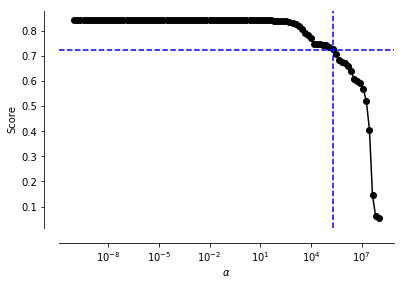

In [226]:
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [232]:
print(lassocv_alpha)
print(lassocv_score)
lassocvfit.

209067.77468299225
0.7239847409912272


<bound method BaseEstimator.get_params of LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)>

In [202]:
# Lasso
lasso = linear_model.LassoCV() # create a ridge regression instance
lasso.fit(train_x, train_y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(array([-6.45823167e+01,  3.89323030e-01,  1.28142704e+04, -1.89160493e+02,
        -4.96461595e+03,  1.02189213e+04,  5.49949104e+03,  2.57448886e+02,
        -3.25625478e+02, -4.24139839e+03,  2.61362347e+01,  9.35890582e+03,
        -2.75629448e+03,  7.41771534e+03, -8.68013678e+03,  5.09499175e+03,
         1.12541789e+03,  3.25669158e+01, -1.17766494e+03,  3.65472218e+01,
         2.66359434e+01,  1.65620946e+01,  1.33743228e+03, -4.86158453e+02,
         7.59168183e+01,  6.30437944e+01,  4.64503157e+01,  7.63386917e+00,
         9.42293858e+03,  1.70369913e+03,  9.86275060e+03,  6.66265565e+03,
        -4.17672074e+03, -2.48974496e+04,  8.97137821e+03,  5.49497831e+03,
         5.20822739e+03,  4.74305405e+03, -3.46950855e+02, -9.47943241e+01,
         9.42269524e+02,  8.70425771e+03,  1.86875303e+01,  5.10406291e+03,
        -1.03027587e+04,  5.54593482e+02,  1.76700753e+01, -7.40344419e+01,
        -6.52886961e+01, -3.71700354e+01, -2.15646039e+01, -1.38963567e+01,
         0.0

In [203]:
from sklearn.model_selection import GridSearchCV

para_search = GridSearchCV(estimator=lasso, param_grid=alpha_100,  cv=5, return_train_score=True)
para_search = para_search.fit(train_x, train_y)

AttributeError: 'numpy.float64' object has no attribute 'items'

TRIAL

https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

In [303]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [304]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [191]:
numeric_columns = [c for c in all_data.columns if all_data[c].dtype in ['int64','float64']]
len(numeric_columns)

62

In [190]:
transformer = ReduceVIF()

# Only use 10 columns for speed in this example
X = transformer.fit_transform(all_data.loc[:1460,numeric_columns], test)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping BsmtFinSF1 with vif=inf
Dropping TotalBsmtSF with vif=inf
Dropping 1stFlrSF with vif=inf
Dropping BsmtFullBath with vif=inf
Dropping OpenPorchSF with vif=inf
Dropping YearRemodAdd with vif=34359.97462664237
Dropping GarageYrBlt with vif=23207.179366789063
Dropping YearBuilt with vif=743.0187443158488
Dropping GrLivArea with vif=353.89387314767515
Dropping GarageCond with vif=218.09123809572313
Dropping Street with vif=182.35077638986246
Dropping Functional with vif=108.63604996482096
Dropping ExterQual with vif=107.61416512794865
Dropping ExterCond with vif=88.87568518472867
Dropping TotRmsAbvGrd with vif=81.15341715264323
Dropping OverallQual with vif=80.22840140253611
Dropping BsmtCond with vif=73.09658157901835
Dropping KitchenQual with vif=63.106951328842456
Dropping TotalSqFeet with vif=61.819709613330375
Dropping LandSlope with vif=55.241744383522025
Dropping TotBathrooms with vif=45.889999735238185
Dropping GarageCars with vif=39.604306

LotArea  MasVnrType  MasVnrArea  BsmtExposure  BsmtFinType1  BsmtFinSF2  \
0   8450.0         1.0       196.0           1.0           6.0         0.0   
1   9600.0         0.0         0.0           4.0           5.0         0.0   
2  11250.0         1.0       162.0           2.0           6.0         0.0   
3   9550.0         0.0         0.0           1.0           5.0         0.0   
4  14260.0         1.0       350.0           3.0           6.0         0.0   

   BsmtUnfSF  2ndFlrSF  LowQualFinSF  BsmtHalfBath      ...       WoodDeckSF  \
0      150.0     854.0           0.0           0.0      ...              0.0   
1      284.0       0.0           0.0           1.0      ...            298.0   
2      434.0     866.0           0.0           0.0      ...              0.0   
3      540.0     756.0           0.0           0.0      ...              0.0   
4      490.0    1053.0           0.0           0.0      ...            192.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  Remod   Age  \
0            0.0        0.0          0.0       0.0      0.0    0.0   5.0   
1            0.0        0.0          0.0       0.0      0.0    0.0  31.0   
2            0.0        0.0          0.0       0.0      0.0    1.0   6.0   
3          272.0        0.0          0.0       0.0      0.0    1.0  36.0   
4            0.0        0.0          0.0       0.0      0.0    0.0   8.0   

   IsNew  TotalPorchSF  
0    0.0          61.0  
1    0.0           0.0  
2    0.0          42.0  
3    0.0         307.0  
4    0.0          84.0  

[5 rows x 22 columns]

In [586]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [148]:
data